# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.

> **Once you have completed your project, and you are done with coding restart your kernel and run everything. Make sure it runs without errors.**  
    - For this go to the very top where the tabs are located:
        - Kernel  
            - Restart & Run All  
    - We will check whether the code and results in this notebook is running fine.  


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    3. The label predictions as csv file. -> See last question.

Good Luck!

### Ronaldlee Ejalu

**Honor Pledge:**  
I pledge on my honor that I, **Ronaldlee Ejalu**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV # meaning we can have different hyper parameters that we can tune.

from sklearn.tree import DecisionTreeClassifier, plot_tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import AdaBoostClassifier


In [5]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

#### Helper functions

In [6]:
def plotConfusionMatrix(var_, pred_):
    """plot the confusion matrix"""
    return metrics.ConfusionMatrixDisplay.from_predictions(y_true=var_, y_pred=pred_)

In [7]:
def modelBuilding(classifier, X_train, y_train, X_val, y_val):
    """A function that returns a built classifier object"""
    # initialize the classifer
    clf = classifier()
    
    # fit the model
    clf.fit(X_train, y_train)

    # output the classifier's prediction on the training
    pred_train = clf.predict(X_train)
    
    # derive the training accuracy classification score
    train_accuracy = metrics.accuracy_score(y_true=y_train, y_pred=pred_train)
    
    
    # output the random forest classifier's prediction on the testing set 
    pred_val =clf.predict(X_val)
    
    # derive the testing accuracy classification score
    test_accuracy = metrics.accuracy_score(y_true=y_val, y_pred=pred_val)
    
    print('Training Accuracy : %s' %(str(train_accuracy)))
    print('Testing Accuracy : %s\n' %(str(test_accuracy)))
    

    # Using the classification report from the metrics package to calculate Recall(Sensitivity)
    #, Specificity, Precision and F1-Score.
    print('The classification report is given below:')
    print(metrics.classification_report(y_val, pred_val))
    
    print('\nThe Confusion Matrix is given below:')
    # create a confusion matrix
    metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val) 

In [8]:
def runCrossVal(clf_object, X_train, y_train, var_score, cv):
    """This function runs cross validation"""
    
    clf = clf_object() # initialize a DecisionTreeClassifier object
    scores = cross_val_score(clf, X=X_train, y=y_train, scoring=var_score, cv=cv, n_jobs=1,) # apply cross validation on the training data
    print('CV accuracy scores: %s\n' %(scores))
    print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [9]:
def plotValidationCurve(scoresParams, hyperParam, x_axis_name):
    """Function that plots the validation curve of cross validation"""
    fig = plt.figure(figsize=(12, 6))
    plt.plot(scoresParams, label='cv')
    plt.xticks(np.arange(len(hyperParam)), hyperParam, rotation=45)
    plt.ylabel('Score')
    plt.xlabel(x_axis_name)
    plt.title('Validation Curve')
    plt.legend()
    plt.show()

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html#">Reference for the class weight module</a>

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [10]:
# Code to access datasets in same Google Drive folder
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [11]:
loans = pd.read_csv('..\..\datasets\loans_train.csv')
loans_outcome_not_known = pd.read_csv('..\..\datasets\loans_outcome_not_known.csv')
#loans = pd.read_csv('/gdrive/MyDrive/AdvancedMachineLearningClassDSC540/loans_train.csv')
#loans_outcome_not_known = pd.read_csv('/gdrive/MyDrive/AdvancedMachineLearningClassDSC540/loans_outcome_not_known.csv')

In [12]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1         credit_card    0.0800       101.85       10.596635   
1              1           all_other    0.1114       328.04       10.530495   
2              1  debt_consolidation    0.1324       676.20       11.289782   
3              1  debt_consolidation    0.1103       671.44       10.555813   
4              0  debt_consolidation    0.1545       244.21       10.308953   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  10.26   747        7560.000000      18467        30.9               3   
1  14.13   722        1920.000000       6811        56.8               0   
2  20.73   697        4080.000000      16805        64.1               0   
3  15.72   722        3580.041667      31566        32.3               1   
4  18.80   647        1950.041667       4587        41.0               2   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               1  
4            0        0               0

In [13]:
# return a tuple representing the dimensionality of the DataFrame
loans.shape

(7478, 14)

<p>We have 7478 observation with 14 features.</p>

In [14]:
loans_outcome_not_known.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1324       540.96       10.596635   
1              0         educational    0.1221       333.15       11.156193   
2              1  debt_consolidation    0.1218       166.50       10.753836   
3              0      major_purchase    0.1461       124.12       10.239960   
4              1         credit_card    0.0800       156.69       10.434116   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  11.73   672        3210.000000       5671        55.1               0   
1  15.82   707        5314.000000     107643        81.0               3   
2   6.38   772        1440.000000        233         6.7               0   
3   0.00   692        1530.041667          0         0.0               6   
4  15.85   767       10170.000000       5748        12.3               0   

   delinq.2yrs  pub.rec  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            1        0

In [15]:
# return a tuple representing the dimensionality of the DataFrame
loans_outcome_not_known.shape

(2100, 13)

<p>We have 2100 observations with 13 columns in the loans_outcome_not_known data frame.</p>

**Check out the info(), head(), and describe() methods on loans.**

In [16]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


<p>Amongst the 14 variables in the loans data frame, only one variable is a categorical attribute, which is Purpose.</p>
<p>There are 7478 observations with 14 attributes in the loans data set.</p>

In [17]:
# prints the index dtype, columns, non-null values and memory usage information about the loans_outcome_not_known dataframe. 
loans_outcome_not_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2100 non-null   int64  
 1   purpose            2100 non-null   object 
 2   int.rate           2100 non-null   float64
 3   installment        2100 non-null   float64
 4   log.annual.inc     2100 non-null   float64
 5   dti                2100 non-null   float64
 6   fico               2100 non-null   int64  
 7   days.with.cr.line  2100 non-null   float64
 8   revol.bal          2100 non-null   int64  
 9   revol.util         2100 non-null   float64
 10  inq.last.6mths     2100 non-null   int64  
 11  delinq.2yrs        2100 non-null   int64  
 12  pub.rec            2100 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 213.4+ KB


<p>The loans_outcome_not_known data set has 2100 observations with 13 columns.</p>
<p>Furthermore, this data set has only one categorical variable, which is purpose.</p>

In [18]:
# derive the descriptive statistics for the multiple columns at the same time and transpose the result.
loans.describe().T

count          mean           std         min  \
credit.policy      7478.0      0.800615      0.399565    0.000000   
int.rate           7478.0      0.123130      0.026727    0.060000   
installment        7478.0    322.555320    208.950622   15.670000   
log.annual.inc     7478.0     10.936374      0.621971    7.547502   
dti                7478.0     12.624763      6.896500    0.000000   
fico               7478.0    710.180663     37.537593  612.000000   
days.with.cr.line  7478.0   4543.688470   2477.818646  180.041667   
revol.bal          7478.0  17297.382455  36013.911693    0.000000   
revol.util         7478.0     46.917329     28.982548    0.000000   
inq.last.6mths     7478.0      1.618748      2.244517    0.000000   
delinq.2yrs        7478.0      0.161942      0.530832    0.000000   
pub.rec            7478.0      0.063921      0.263576    0.000000   
not.fully.paid     7478.0      0.191629      0.393609    0.000000   

                           25%          50%           75%           max  
credit.policy         1.000000     1.000000      1.000000  1.000000e+00  
int.rate              0.105100     0.122900      0.141100  2.164000e-01  
installment         165.425000   271.110000    441.600000  9.401400e+02  
log.annual.inc       10.555813    10.933107     11.302204  1.418015e+01  
dti                   7.200000    12.680000     17.992500  2.996000e+01  
fico                682.000000   707.000000    737.000000  8.220000e+02  
days.with.cr.line  2820.000000  4110.041667   5700.958333  1.763996e+04  
revol.bal          3109.000000  8654.000000  18270.000000  1.207359e+06  
revol.util           23.000000    46.600000     70.775000  1.190000e+02  
inq.last.6mths        0.000000     1.000000      2.000000  3.300000e+01  
delinq.2yrs           0.000000     0.000000      0.000000  1.300000e+01  
pub.rec               0.000000     0.000000      0.000000  5.000000e+00  
not.fully.paid        0.000000     0.000000      0.000000  1.000000e+00

In [19]:
# derive the descriptive statistics for the multiple columns at the same time and transpose the result.
loans_outcome_not_known.describe().T

count          mean           std         min  \
credit.policy      2100.0      0.820476      0.383882    0.000000   
int.rate           2100.0      0.120896      0.027204    0.060000   
installment        2100.0    306.747486    199.796686   16.310000   
log.annual.inc     2100.0     10.916959      0.588511    8.294050   
dti                2100.0     12.542281      6.840411    0.000000   
fico               2100.0    713.216667     39.391612  612.000000   
days.with.cr.line  2100.0   4621.583730   2563.507241  178.958333   
revol.bal          2100.0  15548.628571  24010.740760    0.000000   
revol.util         2100.0     46.378710     29.130651    0.000000   
inq.last.6mths     2100.0      1.430476      2.028483    0.000000   
delinq.2yrs        2100.0      0.170000      0.597880    0.000000   
pub.rec            2100.0      0.055714      0.256856    0.000000   

                           25%          50%           75%            max  
credit.policy         1.000000     1.000000      1.000000       1.000000  
int.rate              0.099600     0.121800      0.138500       0.212100  
installment         157.452500   262.145000    413.695000     922.420000  
log.annual.inc       10.571317    10.915088     11.289782      14.528354  
dti                   7.227500    12.590000     17.850000      29.720000  
fico                682.000000   707.000000    742.000000     827.000000  
days.with.cr.line  2760.041667  4229.958333   5850.000000   16350.000000  
revol.bal          3450.500000  8449.000000  18112.000000  255001.000000  
revol.util           21.400000    45.350000     71.700000     106.100000  
inq.last.6mths        0.000000     1.000000      2.000000      28.000000  
delinq.2yrs           0.000000     0.000000      0.000000      11.000000  
pub.rec               0.000000     0.000000      0.000000       4.000000

**Unique values of not.fully.paid**

In [20]:
# loans['not.fully.paid'].value_counts()

In [21]:
# the unique values in not.fully.paid variable within the loans data set
loans['not.fully.paid'].unique()

array([0, 1], dtype=int64)

<p>The unique values in the **not.fully.paid** variable are 0 and 1 in the loans data set.</p>

In [22]:
# lets calculate the proportions of those people who either paid the loan back or not.
temp = loans['not.fully.paid'].value_counts()/loans['not.fully.paid'].count()* 100 
temp 

0    80.837122
1    19.162878
Name: not.fully.paid, dtype: float64

In [23]:
# we convert the panda series into a data frame
df = pd.DataFrame(temp)
df.reset_index(inplace=True) # reset the index

df.rename(columns={'index': 'not.fully.paid', 'not.fully.paid': '%Proportions'}, inplace=True)  # rename the columns
df

not.fully.paid  %Proportions
0               0     80.837122
1               1     19.162878

<p>From the above Data frame, we have 19.16% of the people who took out loans which were never fully paid back.</p>

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [24]:
# YOUR CODE
# lets extract out the specific columns from the loans data set
df_fico_Cp = loans[['fico', 'credit.policy']] 

In [25]:
# using value_counts, lets look at the number of values in each category.
df_fico_Cp['credit.policy'].value_counts()

1    5987
0    1491
Name: credit.policy, dtype: int64

<p> 1 - 5887 ansd 0 1491</p>

In [26]:
# we need to separate the credit policy criteria for each customer.
creditPolicyOne = df_fico_Cp['credit.policy'] == 1
creditPolicyZero = df_fico_Cp['credit.policy'] == 0
creditPolicyZero.head()

0    False
1    False
2    False
3    False
4     True
Name: credit.policy, dtype: bool

In [27]:
creditPolicyOne.head()

0     True
1     True
2     True
3     True
4    False
Name: credit.policy, dtype: bool

<p>We use these list of booleans to create datasets of each category score as shown below:</p>

In [28]:
df_Credit_Policy_1 = df_fico_Cp[creditPolicyOne]
df_Credit_Policy_0 = df_fico_Cp[creditPolicyZero]

In [29]:
# let's return a tuple representing the dimensionality of the each DataFrame
print(df_Credit_Policy_1.shape)
print(df_Credit_Policy_0.shape)

(5987, 2)
(1491, 2)


In [30]:
df_Credit_Policy_1.head() # the top 5 records of the data frame

fico  credit.policy
0   747              1
1   722              1
2   697              1
3   722              1
5   742              1

In [31]:
df_Credit_Policy_0.head() # the top 5 records of the data frame

fico  credit.policy
4    647              0
10   687              0
11   667              0
12   647              0
15   682              0

### First calculate the number of bins:

In [32]:
ficoArray = df_Credit_Policy_1['fico'].values # convert the data frame column into array
print('type of fico is %s' %type(ficoArray))

# using the derived array calculate the third  and  first quartiles (q3 and q1) 
q3 = np.quantile(ficoArray, 0.75) 

q1 = np.quantile(ficoArray, 0.25)
print('q3 of ficoArray : ', q3)
print('q1 of ficoArray : ', q1)

# Interquartile range
IQR = q3 - q1
print('IQR : ', IQR)

binWidth = 2 * IQR / (ficoArray.size ** (1/3))
print('Number of bins : ', binWidth)

type of fico is <class 'numpy.ndarray'>
q3 of ficoArray :  742.0
q1 of ficoArray :  687.0
IQR :  55.0
Number of bins :  6.05791161167198


<p>Instead of using 6 bins, we shall use 30.</p>

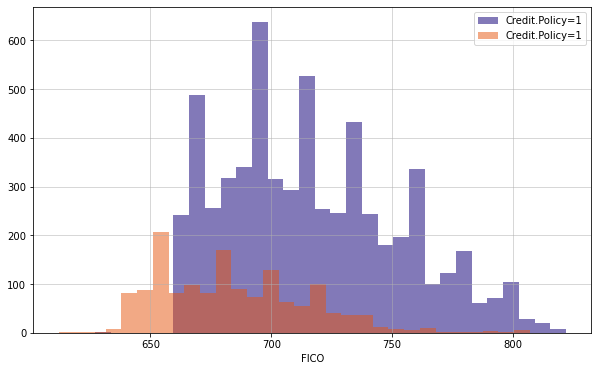

In [33]:
fig = plt.figure(figsize=(10, 6))
plt.hist(df_Credit_Policy_1['fico'],  color='#756bb1', alpha=0.9, bins=30, label = 'Credit.Policy=1')
plt.hist(df_Credit_Policy_0['fico'],  color='#e6550d', alpha=0.5, bins=30, label = 'Credit.Policy=1')
plt.grid(True, linewidth = '0.5')
plt.legend(loc='upper right')
plt.xlabel('FICO')
plt.show()

### Using the seaborn package, we can get the same visualization chat above using searborn as shown below:

In [34]:
# let's create a copy of the data set.
df_fico_Cp_ver2 = df_fico_Cp.copy() 
df_fico_Cp_ver2.head()

fico  credit.policy
0   747              1
1   722              1
2   697              1
3   722              1
4   647              0

In [35]:
# let's replace the values of 0 and 1 in credit.policy variable
df_fico_Cp_ver2.loc[df_fico_Cp_ver2['credit.policy'] == 1, 'credit.policy'] = 'credit.policy=1'
df_fico_Cp_ver2.loc[df_fico_Cp_ver2['credit.policy'] == 0, 'credit.policy'] = 'credit.policy=0'

In [36]:
# check if the values have been replaced by displaying the top 5 records
df_fico_Cp_ver2.head()

fico    credit.policy
0   747  credit.policy=1
1   722  credit.policy=1
2   697  credit.policy=1
3   722  credit.policy=1
4   647  credit.policy=0

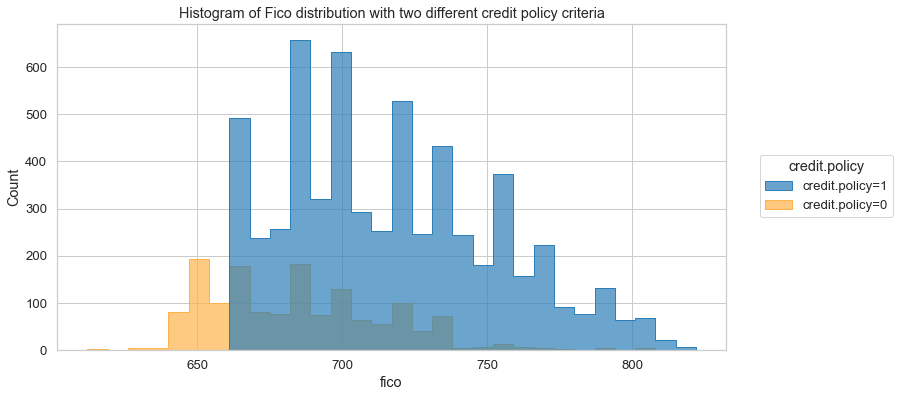

In [37]:
fig = plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2) # set the font size
sns.set_style('whitegrid') # show white grids

ax = sns.histplot(data=df_fico_Cp_ver2
             , x='fico'
             , hue='credit.policy'
             , bins=30
             , alpha=0.7
             , multiple='layer'
             #, legend_out=True
             , element='step'
             , palette= ['#2c7fb8', '#feb24c']
            )
# move the legend
sns.move_legend(ax, bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)

# set the title of the chat
plt.title('Histogram of Fico distribution with two different credit policy criteria')
plt.show()

**Create a similar figure, except this time select by the not.fully.paid column.**

In [38]:
# extract the fico and not.fully.paid columns from the loans data set
df_fico_notFullyPaid = loans[['fico', 'not.fully.paid']]

# display the top 5 records
df_fico_notFullyPaid.head()

fico  not.fully.paid
0   747               0
1   722               0
2   697               0
3   722               1
4   647               0

In [39]:
# create a copy of the data set
df_fico_notFullyPaid_cp = df_fico_notFullyPaid.copy()

In [40]:
# let's replace the values of 0 and 1 in not.fully.paid variable
df_fico_notFullyPaid_cp.loc[df_fico_notFullyPaid_cp['not.fully.paid'] == 1, 'not.fully.paid'] = 'not.fully.paid=1'
df_fico_notFullyPaid_cp.loc[df_fico_notFullyPaid_cp['not.fully.paid'] == 0, 'not.fully.paid'] = 'not.fully.paid=0'

In [41]:
# display the first 5 records
df_fico_notFullyPaid_cp.head()

fico    not.fully.paid
0   747  not.fully.paid=0
1   722  not.fully.paid=0
2   697  not.fully.paid=0
3   722  not.fully.paid=1
4   647  not.fully.paid=0

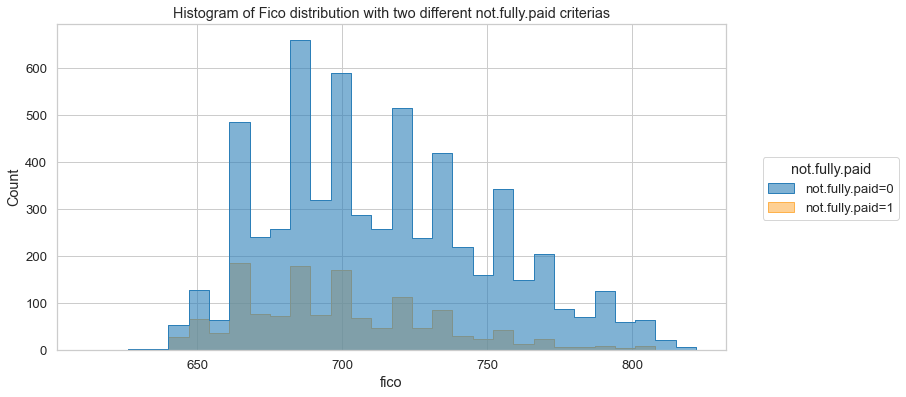

In [42]:
fig = plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2) # set the font size
sns.set_style('whitegrid') # show white grids

ax = sns.histplot(data=df_fico_notFullyPaid_cp
             , x='fico'
             , hue='not.fully.paid'
             , bins=30
             , alpha=0.6
             , multiple='layer'
             , element='step'
             , palette= ['#2c7fb8', '#feb24c']
            )
# move the legend
sns.move_legend(ax, bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.2)


# set the title of the chat
plt.title('Histogram of Fico distribution with two different not.fully.paid criterias')
plt.show()

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

In [43]:
# sns.countplot?

In [44]:
# extract out the purpose and not.fully.paid variables from the loans data set
df_purp_notFd = loans[['purpose', 'not.fully.paid']]
df_purp_notFd.head() # display the first 5 records

purpose  not.fully.paid
0         credit_card               0
1           all_other               0
2  debt_consolidation               0
3  debt_consolidation               1
4  debt_consolidation               0

In [45]:
# count of loans by purpose
df_purp_notFd['purpose'].value_counts()

debt_consolidation    3075
all_other             1782
credit_card            972
home_improvement       514
small_business         508
major_purchase         347
educational            280
Name: purpose, dtype: int64

In [46]:
df_subtotals = df_purp_notFd.groupby(['purpose','not.fully.paid'])['not.fully.paid'].count()
df_subtotals

purpose             not.fully.paid
all_other           0                 1427
                    1                  355
credit_card         0                  834
                    1                  138
debt_consolidation  0                 2508
                    1                  567
educational         0                  213
                    1                   67
home_improvement    0                  414
                    1                  100
major_purchase      0                  303
                    1                   44
small_business      0                  346
                    1                  162
Name: not.fully.paid, dtype: int64

In [47]:
# using the crosstab function
ct_result = pd.crosstab(df_purp_notFd['purpose'], df_purp_notFd['not.fully.paid'])
ct_result

not.fully.paid         0    1
purpose                      
all_other           1427  355
credit_card          834  138
debt_consolidation  2508  567
educational          213   67
home_improvement     414  100
major_purchase       303   44
small_business       346  162

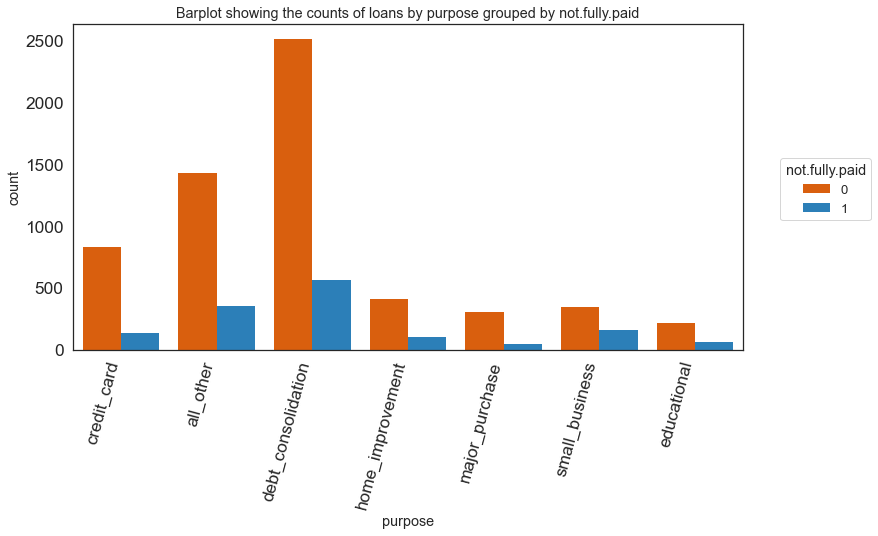

In [48]:
fig = plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2) # set the font size
sns.set_style('white') # show white grids

ax = sns.countplot(data=df_purp_notFd
             , x='purpose'
             , hue='not.fully.paid'
             , saturation=1
             , palette= ['#d95f0e', '#2c7fb8']
             , linewidth=0
            )
# rotate the label text for the x-axis to 75 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontsize='large')
plt.yticks(fontsize='large')
# move the legend
sns.move_legend(ax, bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.3)

# set the title of the chat
plt.title('Barplot showing the counts of loans by purpose grouped by not.fully.paid')
plt.show()

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

In [49]:
# let's look at the data
loans[['fico', 'int.rate']].head()

fico  int.rate
0   747    0.0800
1   722    0.1114
2   697    0.1324
3   722    0.1103
4   647    0.1545

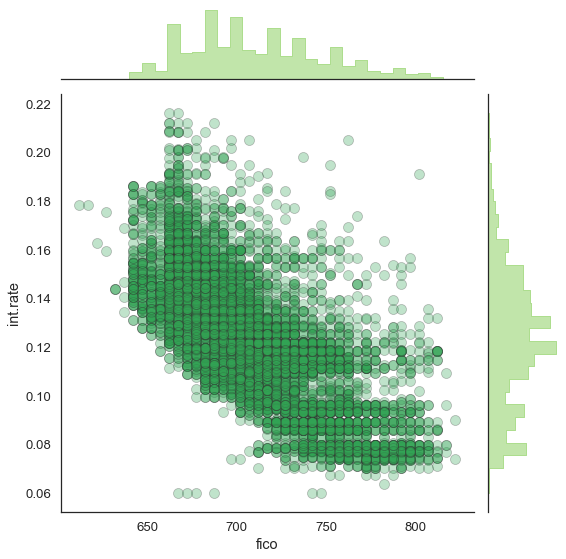

In [50]:
s = sns.JointGrid(data=loans, x='fico', y='int.rate', height=8)
s.plot_joint(sns.scatterplot, s=100, alpha=0.3,  edgecolor='0.2', color= '#31a354')
s.plot_marginals(sns.histplot, color= '#addd8e', bins=30, element='step')
plt.show();

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

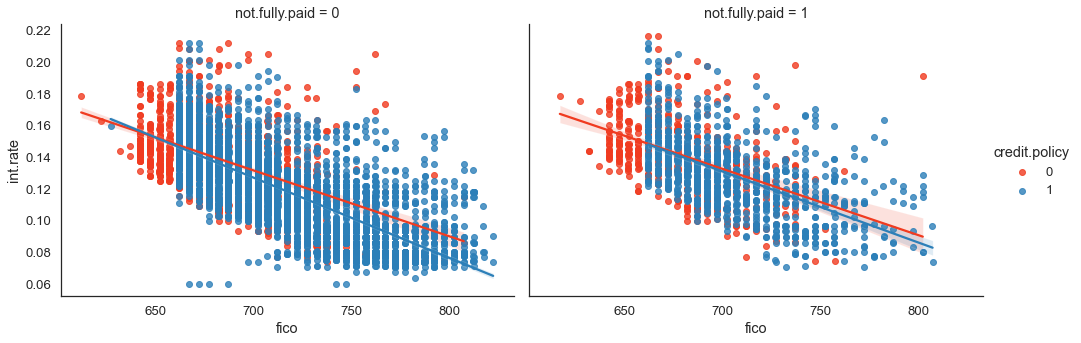

In [51]:
s = sns.lmplot(data=loans
               , x='fico'
               , y='int.rate'
               , col='not.fully.paid'
               , hue='credit.policy'
               , palette = ['#f03b20','#2c7fb8']
               , height = 5
               , aspect=1.4    # aspect * height gives you the width of the facet in inches
               , x_jitter=.1
              )


# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [52]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [53]:
loans.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1         credit_card    0.0800       101.85       10.596635   
1              1           all_other    0.1114       328.04       10.530495   
2              1  debt_consolidation    0.1324       676.20       11.289782   
3              1  debt_consolidation    0.1103       671.44       10.555813   
4              0  debt_consolidation    0.1545       244.21       10.308953   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  10.26   747        7560.000000      18467        30.9               3   
1  14.13   722        1920.000000       6811        56.8               0   
2  20.73   697        4080.000000      16805        64.1               0   
3  15.72   722        3580.041667      31566        32.3               1   
4  18.80   647        1950.041667       4587        41.0               2   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               1  
4            0        0               0

**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [54]:
# purpose is one of the categorical variable that needs to be converted into a dummy variable.
cat_feats = ['purpose']

# create a fixed larger data frame with new feature columns which are dummy variables
loans_combi = pd.get_dummies(loans, columns=cat_feats)

# display the first 5 five records.
loans_combi.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.0800       101.85       10.596635  10.26   747   
1              1    0.1114       328.04       10.530495  14.13   722   
2              1    0.1324       676.20       11.289782  20.73   697   
3              1    0.1103       671.44       10.555813  15.72   722   
4              0    0.1545       244.21       10.308953  18.80   647   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        7560.000000      18467        30.9               3            0   
1        1920.000000       6811        56.8               0            0   
2        4080.000000      16805        64.1               0            0   
3        3580.041667      31566        32.3               1            0   
4        1950.041667       4587        41.0               2            0   

   pub.rec  not.fully.paid  purpose_all_other  purpose_credit_card  \
0        0               0                  0                    1   
1        0               0                  1                    0   
2        0               0                  0                    0   
3        0               1                  0                    0   
4        0               0                  0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           1                    0                         0   
3                           1                    0                         0   
4                           1                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

In [55]:
# return a tuple representing the dimensionality of the loans_combi DataFrame
loans_combi.shape

(7478, 20)

## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = loans_combi.drop('not.fully.paid',axis=1)
y = loans_combi['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

In [58]:
y_train.value_counts()

0    4238
1     996
Name: not.fully.paid, dtype: int64

In [59]:
# print some information about the X_train data set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 613 to 864
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               5234 non-null   int64  
 1   int.rate                    5234 non-null   float64
 2   installment                 5234 non-null   float64
 3   log.annual.inc              5234 non-null   float64
 4   dti                         5234 non-null   float64
 5   fico                        5234 non-null   int64  
 6   days.with.cr.line           5234 non-null   float64
 7   revol.bal                   5234 non-null   int64  
 8   revol.util                  5234 non-null   float64
 9   inq.last.6mths              5234 non-null   int64  
 10  delinq.2yrs                 5234 non-null   int64  
 11  pub.rec                     5234 non-null   int64  
 12  purpose_all_other           5234 non-null   uint8  
 13  purpose_credit_card         5234

In [60]:
y_train.shape

(5234,)

In [61]:
# print some information about the X_val data set
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 5845 to 2975
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2244 non-null   int64  
 1   int.rate                    2244 non-null   float64
 2   installment                 2244 non-null   float64
 3   log.annual.inc              2244 non-null   float64
 4   dti                         2244 non-null   float64
 5   fico                        2244 non-null   int64  
 6   days.with.cr.line           2244 non-null   float64
 7   revol.bal                   2244 non-null   int64  
 8   revol.util                  2244 non-null   float64
 9   inq.last.6mths              2244 non-null   int64  
 10  delinq.2yrs                 2244 non-null   int64  
 11  pub.rec                     2244 non-null   int64  
 12  purpose_all_other           2244 non-null   uint8  
 13  purpose_credit_card         22

In [62]:
y_val.shape

(2244,)

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

Training Accuracy : 1.0
Testing Accuracy : 0.7116755793226381

The classification report is given below:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1807
           1       0.26      0.25      0.26       437

    accuracy                           0.71      2244
   macro avg       0.54      0.54      0.54      2244
weighted avg       0.71      0.71      0.71      2244


The Confusion Matrix is given below:


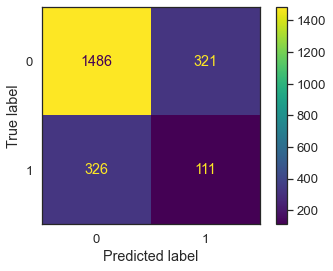

In [63]:
# Call the function 
modelBuilding(DecisionTreeClassifier, X_train, y_train, X_val, y_val)

<p>As calculated above, the <b>training</b> and <b>testing</b> accuracy scores are <b>1.0</b> and <b>0.7</b> respectively. There is a difference of <b>0.3</b>, which is a large gap meaning that this model might be overfitting. Because of this large gap, we might want to close this gap abit more. </p>

<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.25.</li>
<li>Specificity is 0.82.</li>
<li>Precision is 0.26.</li>
<li>Balanced Accuracy is 0.54.</li>
<li>F1 Score is 0.26.</li>
</ul>

### Apply cross-validation using the default tree.

In [64]:
# a helper function that runs cross validation
runCrossVal(DecisionTreeClassifier, X_train, y_train, 'balanced_accuracy', cv)

CV accuracy scores: [0.56301887 0.50830189 0.51712264 0.54334906 0.56155899 0.47618877
 0.52366829 0.51625929 0.50479905 0.52543735]

CV accuracy: 0.524 +/- 0.025


### Applying cross-validation to find the optimum min_samples_split.

min_samples_split is one of the parameters in decision trees that can lead to overfitting if not controlled. Let's  find out the value that works best.

In [65]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [66]:
%%time
scoresParams = []
for num in min_samples_split:
    # initialize a DecisionTreeClassifier object
    dt = DecisionTreeClassifier(min_samples_split=num)
    
    # apply cross validation on the training data
    scores=cross_val_score(dt, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the score to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 6.28 s


In [67]:
scoresParams

[0.5321794206618573,
 0.5312127831912055,
 0.5356268019415349,
 0.5378608363847224,
 0.5411469096829393,
 0.5356774468896107,
 0.5378526473080869,
 0.5333796921442445,
 0.527605243523148,
 0.5248723343430288,
 0.5241596271831117,
 0.5219206243486653,
 0.5239738452367918]

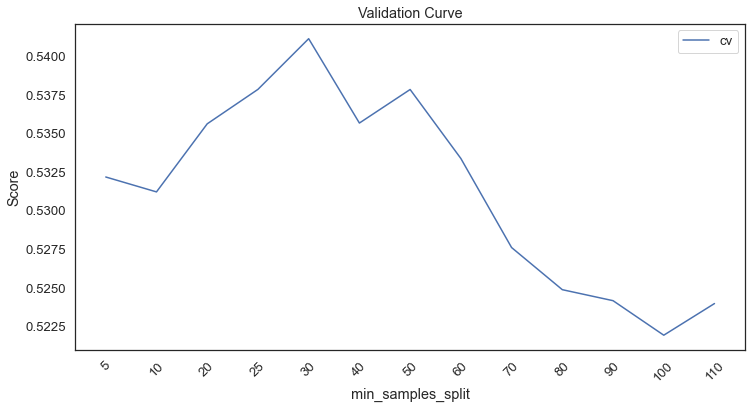

In [68]:
# helper function that plots the Validation curve
plotValidationCurve(scoresParams, min_samples_split, 'min_samples_split')

min_samples_split = 30

### Applying cross-validation to find the optimum max_depth.

Also, max_depth is one of the parameters in decision trees that can lead to overfitting if not controlled. Let's find out the value that works best.

In [69]:
maxDepthL = [1,2,3, 4,5, 6,7,8,9,10,11,12,13,14, 15,16,17, 18,19, 20,21,22, 23,24,25,26, 27, None]

In [70]:
%%time
scoresParams = []
for num in maxDepthL:
    # initialize a DecisionTreeClassifier object
    dt = DecisionTreeClassifier(max_depth=num)
    
    # apply cross validation on the training data
    scores=cross_val_score(dt, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the score to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 11.2 s


In [71]:
scoresParams

[0.5,
 0.5,
 0.5025546046575753,
 0.5092991658860788,
 0.5122851690327603,
 0.5131585749100804,
 0.5232960962495287,
 0.5200853182568357,
 0.5213395273489614,
 0.5278156535244051,
 0.5236780744011776,
 0.5269687896629889,
 0.5243292590700258,
 0.5256965712930185,
 0.5283648194104839,
 0.528529127079709,
 0.5326424390431816,
 0.5291882149475485,
 0.5285064606320126,
 0.5335346378274921,
 0.5245080512065659,
 0.5288151648966581,
 0.5224983384629109,
 0.5289827459662868,
 0.5292311878317497,
 0.527838682894785,
 0.530849724665361,
 0.5222777828465304]

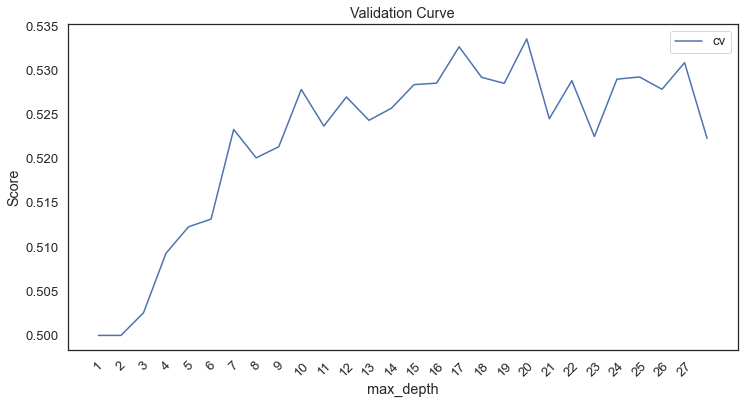

In [72]:
# helper function that plots the Validation curve
plotValidationCurve(scoresParams, maxDepthL, 'max_depth')

max_depth = None since the tree keeps on growing. 

### Perform a grid search where you check for combinations of these hyper-parameters.

In [73]:
params = dict(
   min_samples_split = [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110],
   #max_depth = [1,2,3, 4, 5,6,7, 8,9,10,11,12,13,14,15,16,17,18, 19,20, 21,22, 23, 24,25, 26, 27, None]
   max_depth = [1,2,3, None]
)
params

{'min_samples_split': [5, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_depth': [1, 2, 3, None]}

In [74]:
dt = DecisionTreeClassifier()

In [75]:
# creating a gridsearch object
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1,)
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 25, 30, 40, 50, 60,
                                               70, 80, 90, 100, 110]},
             scoring='balanced_accuracy')

In [76]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 25, 30, 40, 50, 60,
                                               70, 80, 90, 100, 110]},
             scoring='balanced_accuracy')

In [77]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_split=30)

In [78]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [79]:
gs.best_params_

{'max_depth': None, 'min_samples_split': 30}

In [80]:
# best estimator is the model. 
best_estimator = gs.best_estimator_

In [81]:
best_estimator.get_depth()

28

In [82]:
# output the best estimator prediction on the training set
pred_train = best_estimator.predict(X_train)
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.8635842567825754

In [84]:
pred = best_estimator.predict(X_val)

In [85]:
metrics.accuracy_score(y_val, pred)

0.7437611408199644

In [86]:
dot_data = export_graphviz(best_estimator
                           , filled=True
                           , rounded=True
                           , out_file=None
                           , class_names = ['1','0']
                           , feature_names=X_train.columns
                          )
graph = graph_from_dot_data(dot_data)

In [87]:
# Display the image
Image(graph.create_png())

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - also, compare the results to the model with default paramters to see if there are any changes

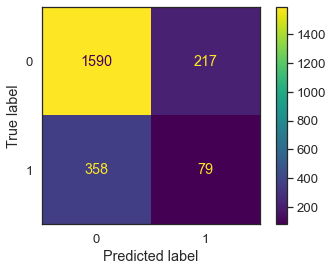

In [88]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred)

In [89]:
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1807
           1       0.27      0.18      0.22       437

    accuracy                           0.74      2244
   macro avg       0.54      0.53      0.53      2244
weighted avg       0.71      0.74      0.72      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.18.</li>
<li>Specificity is 0.88.</li>
<li>Precision is 0.27.</li>
<li>Balanced Accuracy is 0.53.</li>
<li>F1 Score is 0.22.</li>
</ul>

<p>There is a slight improvement in the model since Specificity increased from 0.82 to 0.88 which means that the model is likely to predict those customers who are  able to pay back the investor's money.</p>
<p>Also, the model's training and validation accuracy is 0.86 and 0.74 respectively, which are different from the model with the default parameters. The new model still overfits,however, there is a slight improvement in the validation accuracy. Also, Recall decreased from 0.25 to 0.18.</p>

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

Training Accuracy : 1.0
Testing Accuracy : 0.8070409982174688

The classification report is given below:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.56      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.69      0.52      0.48      2244
weighted avg       0.76      0.81      0.73      2244


The Confusion Matrix is given below:


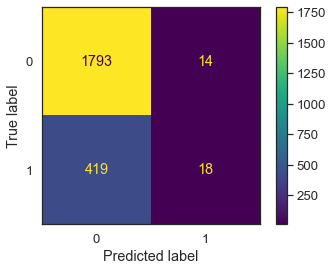

In [90]:
modelBuilding(RandomForestClassifier, X_train, y_train, X_val, y_val)

<p>From the computations above, the training accuracy is 1.0 and testing accuracy is 0.8. There is a difference of 20 percent meaning that this model might be overfitting on the training set so this gap needs to be closed.</p>

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.04.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.56.</li>
<li>Balanced Accuracy is 0.52.</li>
<li>F1 Score is 0.00.</li>
</ul>

### Applying cross-validation using the values of the random forest classifier on the training set.

In [91]:
# a helper function that runs cross validation
runCrossVal(RandomForestClassifier, X_train, y_train, 'balanced_accuracy', cv)

CV accuracy scores: [0.51528302 0.52146226 0.49556604 0.49292453 0.52289403 0.50066705
 0.51666428 0.50656327 0.5079078  0.5014539 ]

CV accuracy: 0.508 +/- 0.010


### Applying cross-validation to find the optimum min_samples_split.

min_samples_split is one of the parameters in Random Forest so let's find the best optiumn value.

In [92]:
min_samples_split = [5, 25, 50, 75, 100]

In [93]:
%%time
scoresParams = []
for num in min_samples_split:
    # initialize a RandomForestClassifier object
    rf = RandomForestClassifier(min_samples_split=num)
    
    # apply cross validation on the training data
    scores=cross_val_score(rf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the score to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 37.1 s


In [94]:
scoresParams

[0.5039954421776983,
 0.5006844052731246,
 0.5000283018867925,
 0.4997641509433962,
 0.4997641509433962]

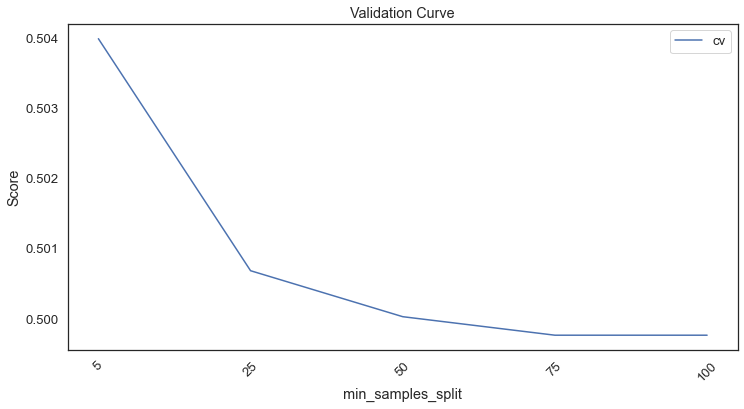

In [95]:
# helper function that plots the validation curve
plotValidationCurve(scoresParams, min_samples_split, 'min_samples_split')

min_samples_split = 5

### Applying cross-validation to find the optimum max_depth

In [96]:
maxDepthL = [10, 500, 1000]

In [97]:
%%time
scoresParams = []
for num in maxDepthL:
    # initialize a RandomForestClassifier object
    rf = RandomForestClassifier(max_depth=num)
    
    # apply cross validation on the training data
    scores=cross_val_score(rf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the score to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 23.7 s


In [98]:
scoresParams

[0.5022507765328922, 0.5069545474820465, 0.5057590355583129]

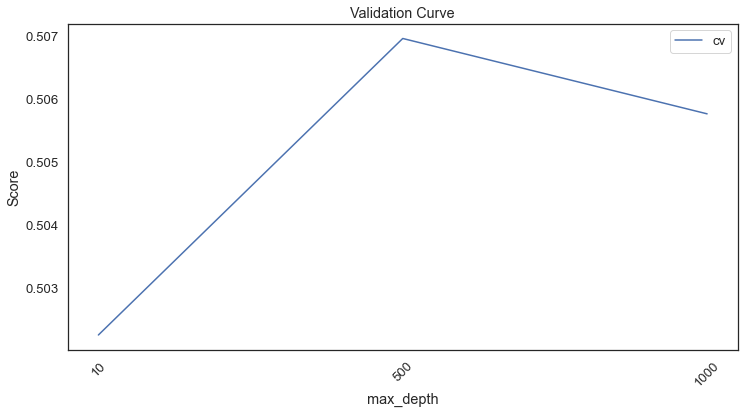

In [99]:
# helper function that plots the validation curve
plotValidationCurve(scoresParams, maxDepthL, 'max_depth')

max_depth = 500

### Applying cross-validation to find the optimum n_estimators hyper-parameter

In [100]:
n_estimators = [50,  250, 500]

In [101]:
%%time
scoresParams = []
for num in n_estimators :
    # initialize a RandomForestClassifier object
    rf = RandomForestClassifier(n_estimators =num)
    
    # apply cross validation on the training data
    scores=cross_val_score(rf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the scores to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 1min 9s


In [102]:
scoresParams

[0.5083518292114239, 0.5051531087673199, 0.5050677002866886]

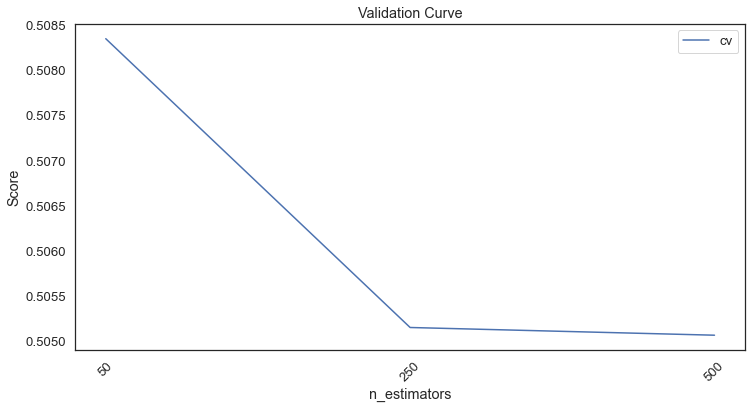

In [103]:
# helper function that plots the validation curve
plotValidationCurve(scoresParams, n_estimators, 'n_estimators')

n_estimators = 50

### Perform a grid search where we check for combinations of these hyper-parameters

In [104]:
params = dict(
    min_samples_split = [5, 40, 50],
    max_depth = [1, 12, 13, 14, 100],
    n_estimators = [50, 150, 300]
)
params

{'min_samples_split': [5, 40, 50],
 'max_depth': [1, 12, 13, 14, 100],
 'n_estimators': [50, 150, 300]}

In [105]:
rf = RandomForestClassifier()

In [106]:
# creating a gridsearch object
gs = GridSearchCV(estimator=rf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 12, 13, 14, 100],
                         'min_samples_split': [5, 40, 50],
                         'n_estimators': [50, 150, 300]},
             scoring='balanced_accuracy')

In [107]:
%%time
gs.fit(X_train, y_train)

Wall time: 47.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 12, 13, 14, 100],
                         'min_samples_split': [5, 40, 50],
                         'n_estimators': [50, 150, 300]},
             scoring='balanced_accuracy')

In [108]:
gs.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_split=5, n_estimators=50)

In [109]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
gs.best_params_

{'max_depth': 14, 'min_samples_split': 5, 'n_estimators': 50}

In [111]:
# obtrain the score of the best performing model
gs.best_score_

0.5074674190722965

In [112]:
# rf_best_estimator is our model
rf_best_estimator = gs.best_estimator_

In [113]:
#rf_best_estimator.get_depth()
# produces an error AttributeError: 'RandomForestClassifier' object has no attribute 'get_depth'

In [114]:
pred_val = rf_best_estimator.predict(X_val)

In [115]:
metrics.accuracy_score(y_val, pred_val)

0.8079322638146168

In [116]:
# we use the independent test dataset to estimate the performance of teh model
# rf_best_estimator.fit(X_train, y_train)
# rf_best_estimator.score(X_val, y_val)

# average training score on the training instances
rf_best_estimator.fit(X_train, y_train).score(X_train, y_train)

0.899694306457776

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - also, compare the results to the model with default paramters to see if there are any changes

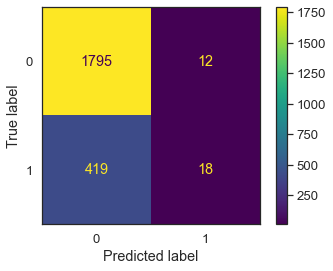

In [117]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [118]:
metrics.confusion_matrix(y_true=y_val, y_pred=pred_val)

array([[1795,   12],
       [ 419,   18]], dtype=int64)

In [119]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.60      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.71      0.52      0.48      2244
weighted avg       0.77      0.81      0.73      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.04.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.60.</li>
<li>Balanced Accuracy is 0.52.</li>
<li>F1 Score is 0.07.</li>
</ul>
<p>Comparing the results of the model with default parameters with the best model:</p>
<p>Recall remained at 0.04.</p>
<p>Specificity remained at 0.99.</p>
<p>Precision increased from 0.56 to 0.60 and Balanced Accuracy stayed at 0.52.</p>
<p>F1-Score remained at 0.07.</p>
<p>We don't see any improvements in Recall, Specificity and F1-scores but  the company be could be interested in those people who are willing to pay back their money, which explains why we have a high Specificity of 99%. For the case where we want to put more emphasis on the smaller class, our recall scores are low meaning that the model is not able to predict all those folks who are not paying back the investor's money. In future we might also look at tunning the hyper-parameter of max_features to determine if this parameter could have any positive results on our scores.</p>
<p>Also, In the best model training accuracy is 0.99 and the testing accuracy is 0.8, which means that the models still overfits on the training data but not as much as in the model with the default parameters.</p>

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

Training Accuracy : 0.815246465418418
Testing Accuracy : 0.803475935828877

The classification report is given below:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.04      0.07       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.48      2244
weighted avg       0.74      0.80      0.73      2244


The Confusion Matrix is given below:


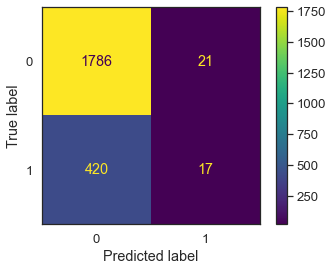

In [120]:
# a helper function that builds a classification object, fits the model, 
# calculates the training and testing accuracies, derives a confusion matrix
modelBuilding(AdaBoostClassifier, X_train, y_train, X_val, y_val)

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.04.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.45.</li>
<li>Balanced Accuracy is 0.51.</li>
<li>F1 Score is 0.07.</li>
</ul>

### Apply cross-validation using the values of the Adaboost classifier on the training set.

In [121]:
# a helper function that runs cross validation
runCrossVal(AdaBoostClassifier, X_train, y_train, 'balanced_accuracy', cv)

CV accuracy scores: [0.51264151 0.51674528 0.52174528 0.53028302 0.52912379 0.51733133
 0.51615209 0.49595007 0.51199764 0.51027187]

CV accuracy: 0.516 +/- 0.009


### Applying cross-validation to find the learning_rate hyper-parameter

In [122]:
learning_rateL = [1.0,  4.0,  6.0]

In [123]:
%%time
scoresParams = []
for num in learning_rateL :
    # initialize a AdaBoostClassifier object
    clf =  AdaBoostClassifier(learning_rate =num)
    
    # apply cross validation on the training data
    scores=cross_val_score(clf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the scores to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 6.08 s


In [124]:
scoresParams 

[0.5162241868707145, 0.5, 0.5]

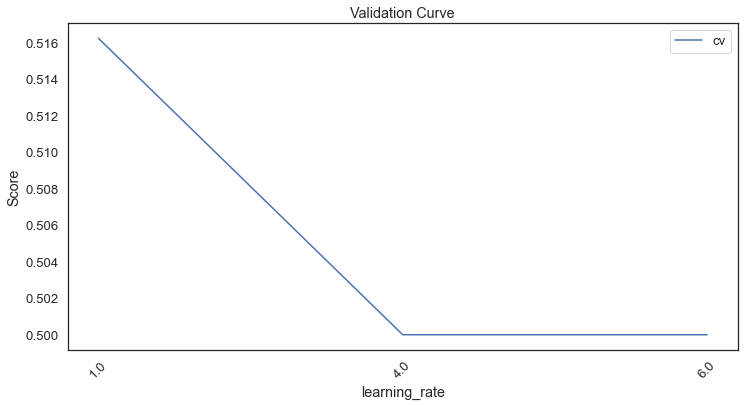

In [125]:
# a helper function that plots the validation curve. 
plotValidationCurve(scoresParams, learning_rateL, 'learning_rate')

The best learning_rate will be equal to 1.0.

### Applying cross-validation to find the n_estimators hyper-parameter

In [126]:
n_estimators = [50,  150,  250, 350, 500]

In [127]:
%%time
scoresParams = []
for num in n_estimators :
    # initialize a AdaBoostClassifier object
    clf = AdaBoostClassifier(n_estimators =num)
    
    # apply cross validation on the training data
    scores=cross_val_score(clf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the scores to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 1min 18s


In [128]:
scoresParams

[0.5162241868707145,
 0.5172491981233451,
 0.521921792189255,
 0.5206848827496159,
 0.5212470945910328]

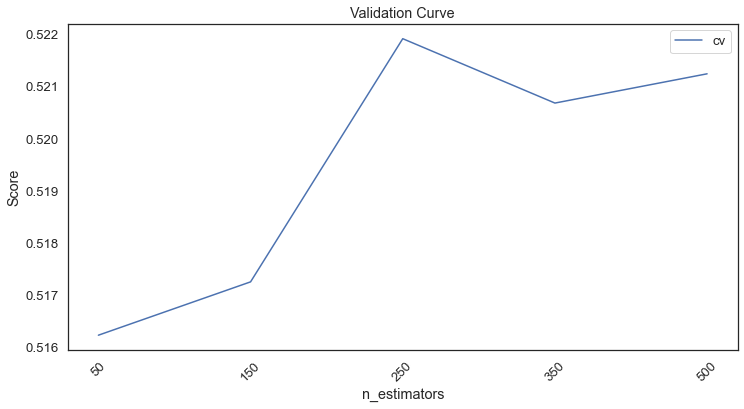

In [129]:
# a helper function that plots the validation curve. 
plotValidationCurve(scoresParams, n_estimators, 'n_estimators')

n_estimators = 250.

### Perform a grid search where we check for combinations of these hyper-parameters

In [130]:
params = dict(
    learning_rate = [1.0,  4.0,  6.0],
    n_estimators = [50, 200,  500]
)
params

{'learning_rate': [1.0, 4.0, 6.0], 'n_estimators': [50, 200, 500]}

In [131]:
# initialize the AdaboostClassifier
clf = AdaBoostClassifier()

In [132]:
# creating a gridsearch object
gs = GridSearchCV(estimator=clf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 6.0],
                         'n_estimators': [50, 200, 500]},
             scoring='balanced_accuracy')

In [133]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 6.0],
                         'n_estimators': [50, 200, 500]},
             scoring='balanced_accuracy')

In [134]:
gs.best_estimator_

AdaBoostClassifier(n_estimators=500)

In [135]:
gs.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 500,
 'random_state': None}

In [136]:
gs.best_params_
print('The learning_rate is %s' %(str(gs.best_params_['learning_rate'])))
print('The n_estimators is %s' %(str(gs.best_params_['n_estimators'])))

The learning_rate is 1.0
The n_estimators is 500


In [137]:
# obtain the score of the best performing model
gs.best_score_

0.5212470945910328

In [138]:
# clf_best_estimator is our model
clf_best_estimator = gs.best_estimator_

In [139]:
# output the best estimator prediction on the training set.
pred_train = clf_best_estimator.predict(X_train)

In [140]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.8282384409629346

In [141]:
# average training score on the training instances can also be derived through chaining.
clf_best_estimator.fit(X_train, y_train).score(X_train, y_train)

0.8282384409629346

In [142]:
# output the prediction on the testing set
pred_val = clf_best_estimator.predict(X_val)

In [143]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.8003565062388592

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - also, compare the results to the model with default paramters to see if there are any changes

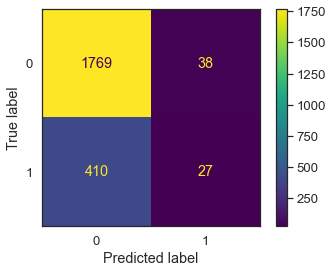

In [144]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [145]:
metrics.confusion_matrix(y_true=y_val, y_pred=pred_val)

array([[1769,   38],
       [ 410,   27]], dtype=int64)

In [146]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1807
           1       0.42      0.06      0.11       437

    accuracy                           0.80      2244
   macro avg       0.61      0.52      0.50      2244
weighted avg       0.73      0.80      0.74      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.06.</li>
<li>Specificity is 0.98.</li>
<li>Precision is 0.42.</li>
<li>Balanced Accuracy is 0.52.</li>
<li>F1 Score is 0.11.</li>
</ul>

<ul>Comparing the results to the model with the default parameters: 
<li>Recall increased from 0.04 to 0.06.</li>
<li>Precision increased decreased from 0.45 to 0.42.</li>
<li>F1 score increased from 0.07 to 0.11.</li>
</ul>
<p>Recall, Precision, and F1 score values are still low. I believe we still have the possibility of tunning other parameters. </p>
<p>Also, observing the training and testing accuracy scores of the model comparing them with default parameters, there is not much of the different and that is why we also look at the Recall, Precision and F1-score scores' values.</p>
<p>Overall, there is less over fitting when you compare Adaboost with DecisionTrees and Random Forests.</p>

# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

Training Accuracy : 0.8291937332823844
Testing Accuracy : 0.8057040998217468

The classification report is given below:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.52      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.66      0.52      0.48      2244
weighted avg       0.75      0.81      0.73      2244


The Confusion Matrix is given below:


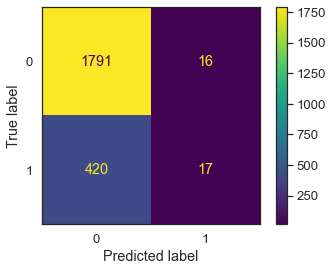

In [147]:
# a helper function that builds a classification object, fits the model, 
# calculates the training and testing accuracies, derives a confusion matrix
modelBuilding(GradientBoostingClassifier, X_train, y_train, X_val, y_val)

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.04.</li>
<li>Specificity is 0.99.</li>
<li>Precision is 0.52.</li>
<li>Balanced Accuracy is 0.52.</li>
<li>F1 Score is 0.07.</li>
</ul>

### Apply cross-validation using the values of the GradientBoost classifier on the training set.

In [148]:
# a helper function that runs cross validation
runCrossVal(GradientBoostingClassifier, X_train, y_train, 'balanced_accuracy', cv)

CV accuracy scores: [0.50264151 0.51792453 0.51910377 0.51174528 0.52053554 0.50807604
 0.52086907 0.49325805 0.50817967 0.50408983]

CV accuracy: 0.511 +/- 0.009


### Apply cross-validation to find the learning_rate hyper-parameter

In [149]:
learning_rateL = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [150]:
%%time
scoresParams = []
for num in learning_rateL :
    # initialize a GradientBoostingClassifier object
    clf =  GradientBoostingClassifier(learning_rate =num)
    
    # apply cross validation on the training data
    scores=cross_val_score(clf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the scores to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 1min 27s


In [151]:
scoresParams

[0.5427947489750983,
 0.5399522645158935,
 0.4699376867835319,
 0.4620018845622017,
 0.5260599673977835,
 0.5395598680502334,
 0.556332881200605,
 0.5001522318731271]

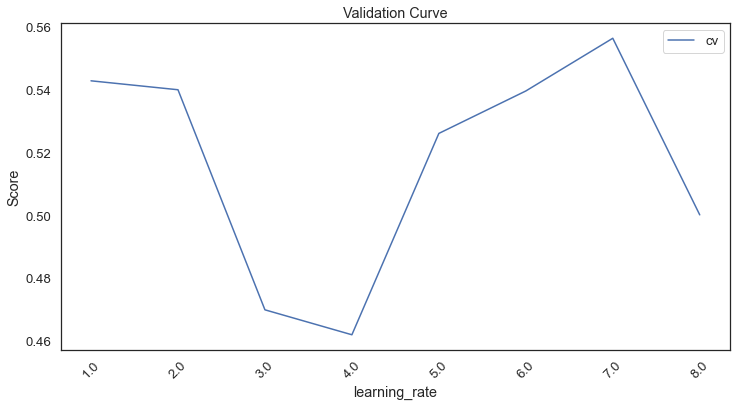

In [152]:
# a helper function that plots the validation curve. 
plotValidationCurve(scoresParams, learning_rateL, 'learning_rate')

According to the validation curve, the learning_rate = 7.0.

### Apply cross-validation to find the n_estimators hyper-parameter

In [153]:
n_estimators = [50,  200, 350, 500, 600, 650]

In [154]:
%%time
scoresParams = []
for num in n_estimators :
    # initialize a GradientBoostingClassifier object
    clf = GradientBoostingClassifier(n_estimators =num)
    
    # apply cross validation on the training data
    scores=cross_val_score(clf, X=X_train, y=y_train, scoring='balanced_accuracy', cv=cv)
    
    # add the mean of the scores to the List of scoresParams
    scoresParams.append(scores.mean())

Wall time: 4min 6s


In [155]:
scoresParams

[0.5063721336204274,
 0.5177537630419005,
 0.520116407957536,
 0.5266465416915036,
 0.5296233450522891,
 0.5252600280200641]

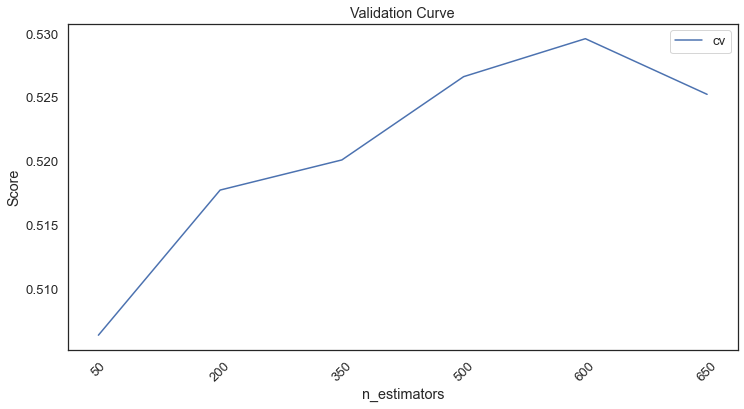

In [156]:
# a helper function that plots the validation curve. 
plotValidationCurve(scoresParams, n_estimators, 'n_estimators')

n_estimators = 600

### Performing a grid search where we check for combinations of these hyper-parameters

In [157]:
params = dict(
    learning_rate = [1.0,  4.0, 7.0, 8.0],
    n_estimators = [50,  200,  350,  500, 600, 650]
)
params

{'learning_rate': [1.0, 4.0, 7.0, 8.0],
 'n_estimators': [50, 200, 350, 500, 600, 650]}

In [158]:
# initialize the GradientBoostingClassifier object
clf = GradientBoostingClassifier()

In [159]:
# create a gridsearch object
gs = GridSearchCV(estimator=clf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 7.0, 8.0],
                         'n_estimators': [50, 200, 350, 500, 600, 650]},
             scoring='balanced_accuracy')

In [160]:
%%time
# run fit will all sets of parameters
gs.fit(X_train, y_train)

Wall time: 1min 43s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 7.0, 8.0],
                         'n_estimators': [50, 200, 350, 500, 600, 650]},
             scoring='balanced_accuracy')

In [161]:
# return the best estimator that was chose by the search
gs.best_estimator_

GradientBoostingClassifier(learning_rate=7.0, n_estimators=50)

In [162]:
# get parameters for the estimator
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 7.0,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [163]:
# return the parameter settings that gave best results on the hold out data
gs.best_params_
print('The learning_rate is %s' %(str(gs.best_params_['learning_rate'])))
print('The n_estimators is %s' %(str(gs.best_params_['n_estimators'])))

The learning_rate is 7.0
The n_estimators is 50


In [164]:
# return the mean cross-validated score of the best-estimator, in this case, the balanced_accuracy
gs.best_score_

0.556332881200605

In [165]:
# clf_best_estimator is our model
clf_best_estimator = gs.best_estimator_

In [166]:
# output the best estimator prediction on the training set
pred_train = clf_best_estimator.predict(X_train)
pred_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.749904470768055

In [168]:
# output the prediction on the testing set
pred_val = clf_best_estimator.predict(X_val)

In [169]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.7575757575757576

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - also, compare the results to the model with default paramters to see if there are any changes

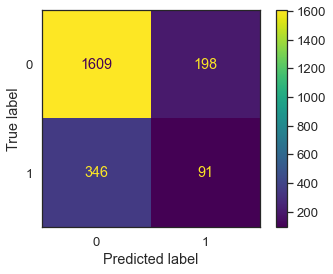

In [170]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [171]:
metrics.confusion_matrix(y_true=y_val, y_pred=pred_val)

array([[1609,  198],
       [ 346,   91]], dtype=int64)

In [172]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1807
           1       0.31      0.21      0.25       437

    accuracy                           0.76      2244
   macro avg       0.57      0.55      0.55      2244
weighted avg       0.72      0.76      0.74      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.21.</li>
<li>Specificity is 0.89.</li>
<li>Precision is 0.31.</li>
<li>Balanced Accuracy is 0.55.</li>
<li>F1 Score is 0.25.</li>
</ul>

<ul>Comparing the results to the model with the default parameters: 
<li>Recall increased from 0.04 to 0.21.</li>
<li>Precision decreases from 0.52 to 0.31.</li>
<li>Balanced Accuracy increased from 0.52 to 0.55.</li>
<li>F1 score increased from 0.07 to 0.25.</li>
</ul>
<p>Recall, Precision, and F1 score values are still low and these could change by tuning other parameters. </p>
<p>Also, observing the training and testing accuracy scores of the model and comparing them with default parameters, the model with hyper-parameters underfits the training data since the training and testing accuracy scores are 0.74 and 0.76 repectively.</p>

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

## With Decision Trees:

<ul>To increase on the accuracy where we prevent overfitting:
<li>we set the minimum number of samples required at a splitting node.</li>
<li>we set the minimum number of samples required at a leaf node.</li>
<li>Also apply prunning where we let the tree grow then start cutting it to make it smaller. </li>
</ul>

We shall make a dictionary of class weights that we can feed into the **DecisionTreeClassifier** model. We do this because we have a problem of un balanced classes.

In [173]:
# let's derive an array that consists of weights for both classes
clf_class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y = y_train)

print('The class weights are %s'%clf_class_weights)

# derive a dictionary of class weights
classWeightsDict = {0: clf_class_weights[0], 1: clf_class_weights[1]}
print('classWeightsDict : %s' %(classWeightsDict)) 

The class weights are [0.61750826 2.62751004]
classWeightsDict : {0: 0.6175082586125531, 1: 2.6275100401606424}


In [174]:
y_train.value_counts()

0    4238
1     996
Name: not.fully.paid, dtype: int64

In [175]:
996/len(y_train)

0.19029423003439053

In [176]:
4238 / len(y_train)

0.8097057699656095

##### Using GridSearchCV, we check for a combination of different parameters to use:

In [177]:
params = dict(
min_samples_split = [5, 40,  75, 100],
min_samples_leaf = [20,  60,  100, 120],
max_depth = [10, 500, 1000]
)
params

{'min_samples_split': [5, 40, 75, 100],
 'min_samples_leaf': [20, 60, 100, 120],
 'max_depth': [10, 500, 1000]}

In [178]:
# let's initialize a DecisionTreeClassifier Object
dt = DecisionTreeClassifier(class_weight=classWeightsDict)

In [179]:
# create a gridsearch object
gs = GridSearchCV(estimator = dt, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                                            1: 2.6275100401606424}),
             n_jobs=-1,
             param_grid={'max_depth': [10, 500, 1000],
                         'min_samples_leaf': [20, 60, 100, 120],
                         'min_samples_split': [5, 40, 75, 100]},
             scoring='balanced_accuracy')

In [180]:
# run fit will all sets of parameters
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                                            1: 2.6275100401606424}),
             n_jobs=-1,
             param_grid={'max_depth': [10, 500, 1000],
                         'min_samples_leaf': [20, 60, 100, 120],
                         'min_samples_split': [5, 40, 75, 100]},
             scoring='balanced_accuracy')

In [181]:
# return the best estimator that was chose by the search
gs.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                     1: 2.6275100401606424},
                       max_depth=10, min_samples_leaf=60, min_samples_split=75)

In [182]:
# get parameters for the estimator
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.6175082586125531, 1: 2.6275100401606424},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 60,
 'min_samples_split': 75,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [183]:
# return the parameter settings that gave best results on the hold out data
gs.best_params_
print('The min_samples_leaf is %s' %(str(gs.best_params_['min_samples_leaf'])))
print('The min_samples_split is %s' %(str(gs.best_params_['min_samples_split'])))

The min_samples_leaf is 60
The min_samples_split is 75


In [184]:
# return the mean cross-validated score of the best-estimator, in this case, the balanced_accuracy
gs.best_score_

0.5975549422364959

In [185]:
# let's also get the maximum depth
best_estimator.get_depth()

28

In [186]:
# dt_best_estimator is our model
dt_best_estimator = gs.best_estimator_

In [187]:
# output the best estimator prediction on the training set
pred_train = dt_best_estimator.predict(X_train)
pred_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [188]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.6566679403897593

In [189]:
# output the prediction on the testing set
pred_val = dt_best_estimator.predict(X_val)

In [190]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.6029411764705882

In [191]:
dot_data = export_graphviz(dt_best_estimator
                           , filled=True
                           , rounded=True
                           , out_file=None
                           , class_names = ['1','0']
                           , feature_names=X_train.columns
                          )
graph = graph_from_dot_data(dot_data)

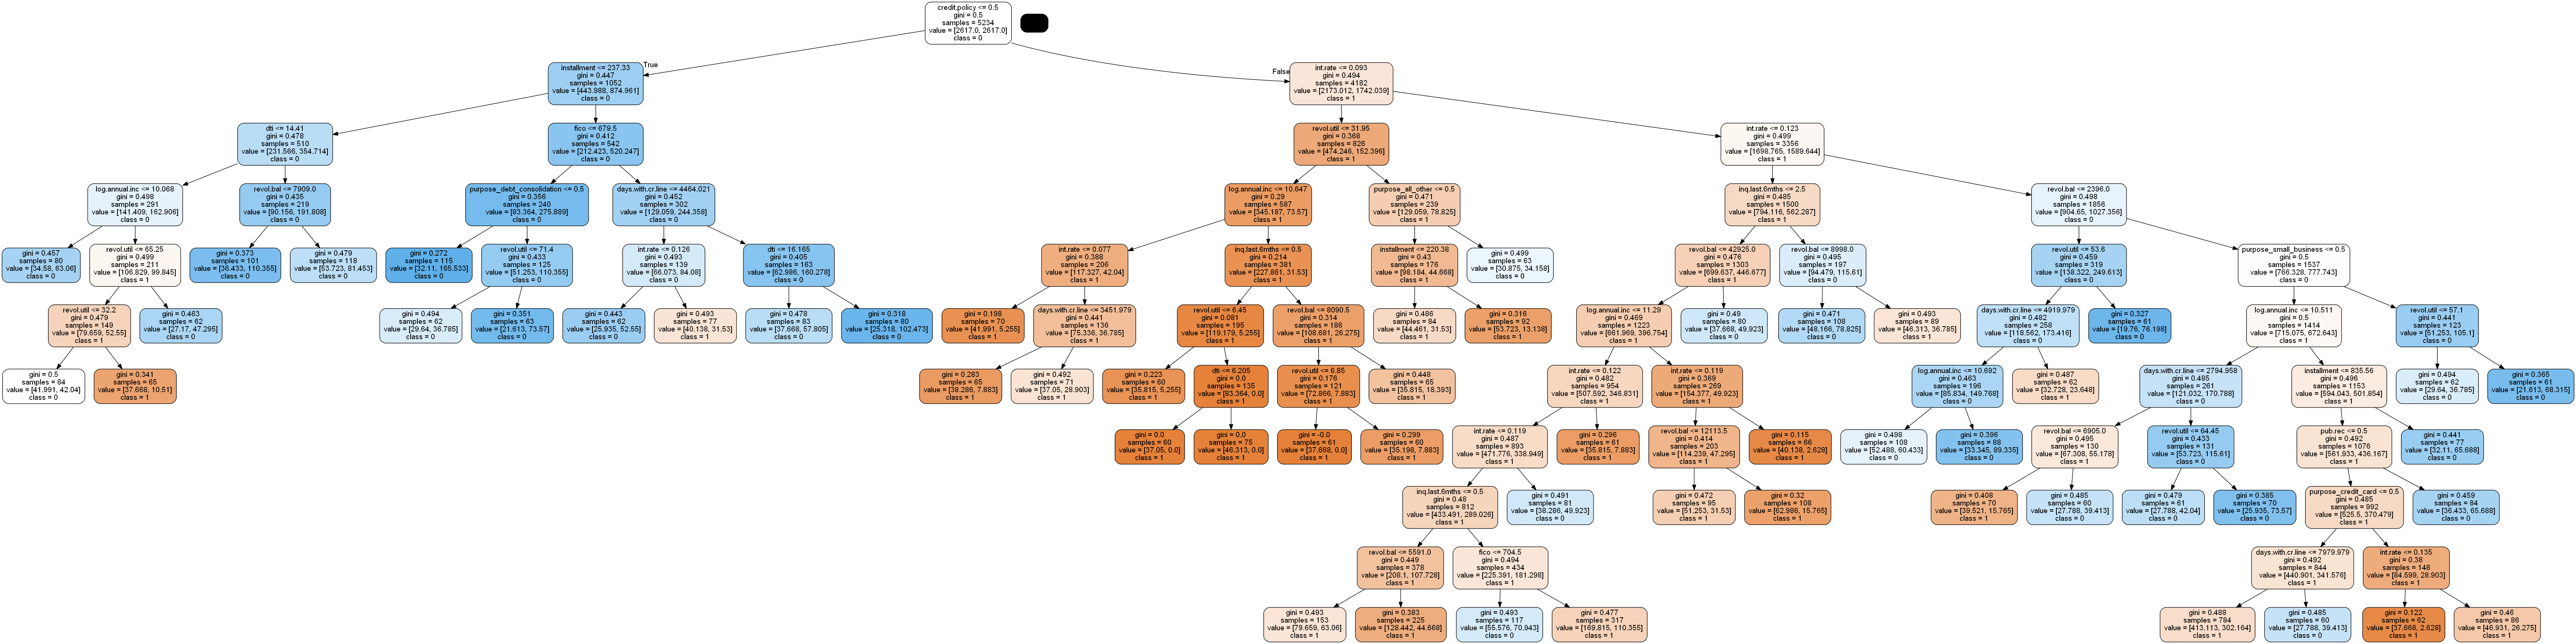

In [192]:
# Display the image
Image(graph.create_png())

In [193]:
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

dtSpecificity = TN/(TN+FP)

dtPrecision = TP/(TP+FP)

dtRecall = TP/(TP+FN)

dtF1Score = 2 * ((dtPrecision * dtRecall)/(dtPrecision + dtRecall))

dtBalancedAccuracy = (dtRecall  + dtSpecificity)/2

print('dtSpecificity: %s' %(str(dtSpecificity)))
print('dtPrecision: %s' %(str(dtPrecision)))
print('dtRecall: %s' %(str(dtRecall)))
print('dtF1Score: %s' %(str(dtF1Score)))
print('dtBalancedAccuracy: %s' %(str(dtBalancedAccuracy)))

dtSpecificity: 0.6170448256779192
dtPrecision: 0.25591397849462366
dtRecall: 0.5446224256292906
dtF1Score: 0.3482077542062912
dtBalancedAccuracy: 0.5808336256536049


- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - also, compare the results to the model with default paramters to see if there are any changes

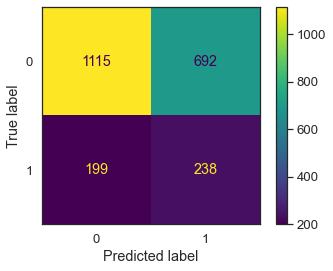

In [194]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [195]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.85      0.62      0.71      1807
           1       0.26      0.54      0.35       437

    accuracy                           0.60      2244
   macro avg       0.55      0.58      0.53      2244
weighted avg       0.73      0.60      0.64      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.54.</li>
<li>Specificity is 0.62.</li>
<li>Precision is 0.26.</li>
<li>Balanced Accuracy is 0.58.</li>
<li>F1 Score is 0.35.</li>
</ul>

<p>So, here we punished the model harder for the incorrect guesses by making a dictionary of class weights which were fed into the DecisionTreeClassifier model. </p>
<p>We also tuned the minimum_samples_leaf, min_samples_split and the maximum depth that reduced the overfitting. Recall increased so we are going to start prunning the tree to see if this will have a positive impact on Recall. </p> 

prunning the length of the tree from 10 to either 6 or 5 max_depth of the tree.

In [196]:
classWeightsDict

{0: 0.6175082586125531, 1: 2.6275100401606424}

In [197]:
# lets create a new decision tree Classifer object
dt = DecisionTreeClassifier(class_weight=classWeightsDict, max_depth=5, min_samples_leaf=60, min_samples_split=40)

In [198]:
# fit the models with the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                     1: 2.6275100401606424},
                       max_depth=5, min_samples_leaf=60, min_samples_split=40)

In [199]:
# output the classifier's prediction on the training set. 
pred_train = dt.predict(X_train)

In [200]:
# derive the training accuracy classification score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.7097821933511654

In [201]:
# output the classifier's prediction on the testing/validation set.
pred_val = dt.predict(X_val)

In [202]:
# derive the testing/validation accuracy classification score
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.6862745098039216

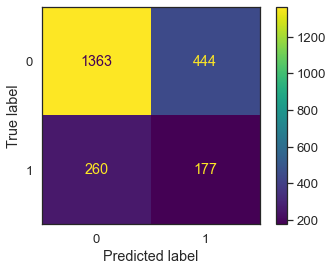

In [203]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [204]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1807
           1       0.29      0.41      0.33       437

    accuracy                           0.69      2244
   macro avg       0.56      0.58      0.56      2244
weighted avg       0.73      0.69      0.71      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.41.</li>
<li>Specificity is 0.75.</li>
<li>Precision is 0.29.</li>
<li>Balanced Accuracy is 0.58.</li>
<li>F1 Score is 0.33.</li>
</ul>

<p>In addition to using the hyper parameters of min_samples_leaf, min_samples_split and the class_weight, we went a head to prune the tree from 10 to values of 6 and 5, which didn't improve recall.  </p>
<p>Also, looking at the training and testing accuracy scores of 0.71 and 0.69 respectively, our model still overfits on the training data though not as much as in the model with the default parameters.</p>

## With RandomForest:

- We need to try to decorrelate trees and increase variety between learners by:
    - decreasing the size of the bootstrap samples increases diversity among trees and also increases the randomness of the random forest, which helps in reducing overfitting.
    - randomly selecting a small number of features which decreases the chance of over-selecting the same feature. 

##### Using GridSearchCV to find a combination of different hyper-parameters to use:

In [205]:
params = dict(
min_samples_leaf = [5, 500],
min_samples_split = [5,  200],
max_depth = [5, 1000],
max_features= [11, 16],
bootstrap= [True, False],
n_estimators = [50, 600]
)
params

{'min_samples_leaf': [5, 500],
 'min_samples_split': [5, 200],
 'max_depth': [5, 1000],
 'max_features': [11, 16],
 'bootstrap': [True, False],
 'n_estimators': [50, 600]}

In [206]:
# let's initialize a RandomForestClassifier Object
rf = RandomForestClassifier(class_weight=classWeightsDict)

In [207]:
# create a gridsearch object
gs = GridSearchCV(estimator = rf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.6175082586125531,
                                                            1: 2.6275100401606424}),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 1000],
                         'max_features': [11, 16], 'min_samples_leaf': [5, 500],
                         'min_samples_split': [5, 200],
                         'n_estimators': [50, 600]},
             scoring='balanced_accuracy')

In [208]:
%%time
# run fit will all sets of parameters
gs.fit(X_train, y_train)

Wall time: 3min 41s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.6175082586125531,
                                                            1: 2.6275100401606424}),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 1000],
                         'max_features': [11, 16], 'min_samples_leaf': [5, 500],
                         'min_samples_split': [5, 200],
                         'n_estimators': [50, 600]},
             scoring='balanced_accuracy')

In [209]:
# return the best estimator that was chosen by the search
gs.best_estimator_

RandomForestClassifier(class_weight={0: 0.6175082586125531,
                                     1: 2.6275100401606424},
                       max_depth=1000, max_features=11, min_samples_leaf=5,
                       min_samples_split=200, n_estimators=50)

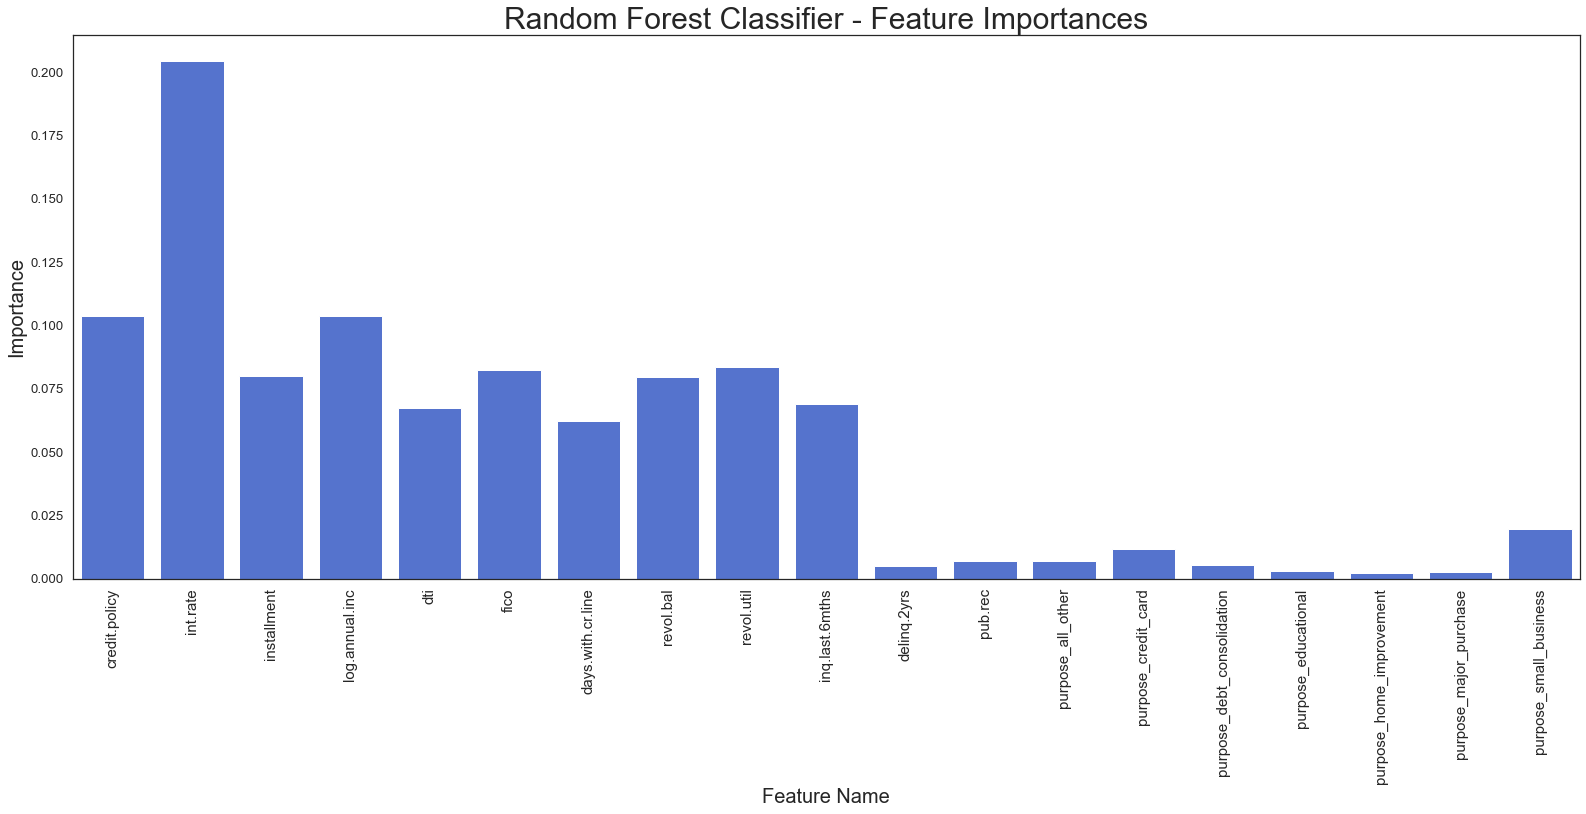

In [210]:
feature_of_importance = gs.best_estimator_.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=[27,10])
sns.barplot(x = feature_names, y = feature_of_importance,color="royalblue")
plt.xticks(rotation = 90, fontsize=15)
plt.title('Random Forest Classifier - Feature Importances', fontsize=30)
plt.ylabel('Importance',fontsize=20)
plt.xlabel('Feature Name', fontsize=20)
plt.show()

<p>From here, we can see that int.rate, installment and fico are significant features in determining whether a customer will payback the investor's money or not</p>

In [211]:
sorted(zip(gs.best_estimator_.feature_importances_, feature_names), reverse=True)

[(0.2043433791697219, 'int.rate'),
 (0.10359230097620944, 'credit.policy'),
 (0.1035420822685461, 'log.annual.inc'),
 (0.08362084149095027, 'revol.util'),
 (0.08236257750507096, 'fico'),
 (0.08017636829283054, 'installment'),
 (0.07955817660841419, 'revol.bal'),
 (0.06905731906689835, 'inq.last.6mths'),
 (0.06746443928492017, 'dti'),
 (0.062396892692228666, 'days.with.cr.line'),
 (0.019782327796979943, 'purpose_small_business'),
 (0.011731703189212602, 'purpose_credit_card'),
 (0.007090929947270543, 'purpose_all_other'),
 (0.006784690869878254, 'pub.rec'),
 (0.005426415392001363, 'purpose_debt_consolidation'),
 (0.005133196865505425, 'delinq.2yrs'),
 (0.003162662132635566, 'purpose_educational'),
 (0.0025475044337226016, 'purpose_major_purchase'),
 (0.0022261920170031117, 'purpose_home_improvement')]

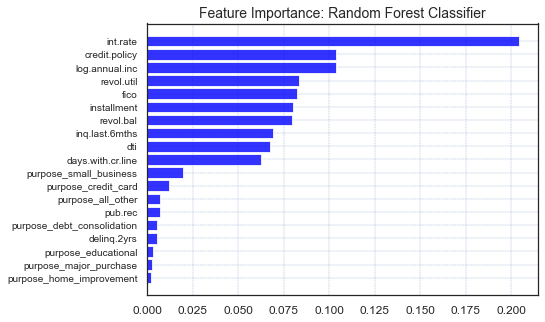

In [212]:
model_type = 'rf' 
model_dict = {'rf':gs.best_estimator_.feature_importances_}
importances = model_dict[model_type]
indices = list(np.argsort(importances)) 
feature_names=X_train.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[7,5])
ax.barh(names, importances[indices], color = 'blue', align ='center',alpha=0.8)

xticklabel_rotation = 0
plt.xticks(rotation=xticklabel_rotation,fontsize=12)

plt.yticks(fontsize=10)
ax.grid(color='b', ls = '-.', lw = 0.25)

# Title
ax.set_title("Feature Importance: Random Forest Classifier",fontsize=14)

# Show plot
plt.show()

<p>Here we see that purpose_education, purpose_home_improvement, delinq.2yrs have less significance to the model</p>

In [213]:
# return the best estimator that was chosen by the search
gs.best_estimator_

RandomForestClassifier(class_weight={0: 0.6175082586125531,
                                     1: 2.6275100401606424},
                       max_depth=1000, max_features=11, min_samples_leaf=5,
                       min_samples_split=200, n_estimators=50)

In [214]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 1000,
 'max_features': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 200,
 'n_estimators': 50}

In [215]:
# rf_best_estimator is our model
rfn_best_estimator = gs.best_estimator_

In [216]:
# output the best estimator prediction on the training set.
pred_train = rfn_best_estimator.predict(X_train)

In [217]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.7132212457011846

In [218]:
# output the prediction on the testing set
pred_val = rfn_best_estimator.predict(X_val)

In [219]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.6631016042780749

In [220]:
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

rf_Specificity = TN/(TN+FP)

rf_Precision = TP/(TP+FP)

rf_Recall = TP/(TP+FN)

rf_F1Score = 2 * ((rf_Precision * rf_Recall)/(rf_Precision + rf_Recall))

rf_BalancedAccuracy = (rf_Recall  + rf_Specificity)/2

print('rf_Specificity: %s' %(str(rf_Specificity)))
print('rf_Precision: %s' %(str(rf_Precision)))
print('rf_Recall: %s' %(str(rf_Recall)))
print('rf_F1Score: %s' %(str(rf_F1Score)))
print('rf_BalancedAccuracy: %s' %(str(rf_BalancedAccuracy)))

rf_Specificity: 0.6917542888765911
rf_Precision: 0.2993710691823899
rf_Recall: 0.5446224256292906
rf_F1Score: 0.3863636363636364
rf_BalancedAccuracy: 0.6181883572529409


- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

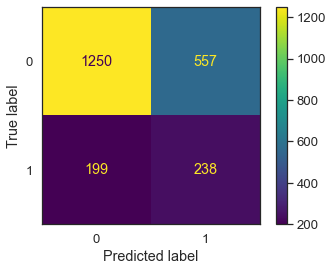

In [221]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [222]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1807
           1       0.30      0.54      0.39       437

    accuracy                           0.66      2244
   macro avg       0.58      0.62      0.58      2244
weighted avg       0.75      0.66      0.69      2244



<ul>The following metrics derived from the classification report above are:
<li>Recall (Sensitivity) is 0.54.</li>
<li>Specificity is 0.67.</li>
<li>Precision is 0.28.</li>
<li>Balanced Accuracy is 0.60.</li>
<li>F1 Score is 0.37.</li>
</ul>
<p>There is an improvement in the Recall scores, it increased from 0.04 to 0.54. Also, Balanced accuracy and the F1-Scores increased.</p>
<p>This is the best model.</p>

### Before running Adaboost and Gradient Boost, lets first let create a balanced data set

In [223]:
# module for resampling
from sklearn.utils import resample

- We create a new DataFrame with an up-sampled minority class where we separate observations from each class into different DataFrames thereafter resample the minority class with replacement, which will match up the number of samples of the majority class.
- Finally, the up-sampled minority class Data Frame will be combined with the original majority class Data Frame. 

In [224]:
# combine X_train with y_train
x_y_train = X_train.copy() # create a copy of the X_train data frame
x_y_train['not.fully.paid'] = y_train

In [225]:
x_y_train['not.fully.paid'].value_counts()

0    4238
1     996
Name: not.fully.paid, dtype: int64

In [226]:
majority_x_y_train = x_y_train[x_y_train['not.fully.paid'] == 0]
minority_x_y_train = x_y_train[x_y_train['not.fully.paid'] == 1]

In [227]:
print(minority_x_y_train.shape[0])

print(majority_x_y_train.shape[0])

996
4238


In [228]:
# let's Upsample minority class
# majority_x_y_train.shape[0] is equal to 4238 derived from the (x_y_train['not.fully.paid'].value_counts())
upsampled_minority_x_y_train = resample(minority_x_y_train, 
                                        replace=True, # sample with replacement
                                        n_samples=majority_x_y_train.shape[0], 
                                        random_state=123
                                        )

# concatenate the majority class with the minority upsampled class
up_sampledCombined_x_y_train = pd.concat([majority_x_y_train, upsampled_minority_x_y_train])
up_sampledCombined_x_y_train['not.fully.paid'].value_counts()

0    4238
1    4238
Name: not.fully.paid, dtype: int64

- lets down-sample the majority class where we separate observations from each class into different DataFrames, thereafter resample the majority class without replacement, which will match up the number of samples of the minority class.
- Then we will combine the data frames of the down-sampled majority  class  with the original minority class.

In [229]:
# separate the minority and majority classes
dmajority_x_y_train = up_sampledCombined_x_y_train[up_sampledCombined_x_y_train['not.fully.paid'] == 0]
dminority_x_y_train = up_sampledCombined_x_y_train[up_sampledCombined_x_y_train['not.fully.paid'] == 1]

# down sample the majority class
downsampled_minority_x_y_train = resample(dmajority_x_y_train, 
                                          replace = False, # without replacement
                                          # number of samples in the original minority class
                                          n_samples = minority_x_y_train.shape[0], 
                                          random_state=123
                                          )

# let's concatenate the classes together (downsampled and dminority)
final_x_y_train = pd.concat([downsampled_minority_x_y_train, dminority_x_y_train])
final_x_y_train['not.fully.paid'].value_counts()

1    4238
0     996
Name: not.fully.paid, dtype: int64

In [230]:
# let's separate the X train from the y labels
#combinedx_y_train = final_x_y_train.copy()
y_train_gb = final_x_y_train['not.fully.paid']
X_train_gb = final_x_y_train.drop('not.fully.paid', axis=1)

print('shape of X_train: %s' %(str(X_train_gb.shape)))
print('shape of y_train: %s' %(str(y_train_gb.shape)))

shape of X_train: (5234, 19)
shape of y_train: (5234,)


We now have a balanced data set.

## With AdaBoostClassifier:

We will train an AdaBoostClassifier on a given number of DecisionTrees using the hyper parameters already derived using GridSearch.


In [231]:
params = dict(
    learning_rate = [1.0, 4.0, 8.0],
    n_estimators = [50,  500],
    random_state = [1, 1000]
)
params

{'learning_rate': [1.0, 4.0, 8.0],
 'n_estimators': [50, 500],
 'random_state': [1, 1000]}

In [232]:
clf = AdaBoostClassifier()

In [233]:
# creating a gridsearch object
gs = GridSearchCV(estimator=clf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 8.0],
                         'n_estimators': [50, 500], 'random_state': [1, 1000]},
             scoring='balanced_accuracy')

In [234]:
%%time
# fit the model with the data
gs.fit(X_train_gb, y_train_gb)

Wall time: 17.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 4.0, 8.0],
                         'n_estimators': [50, 500], 'random_state': [1, 1000]},
             scoring='balanced_accuracy')

In [235]:
gs.best_estimator_

AdaBoostClassifier(n_estimators=500, random_state=1)

In [236]:
# clf_best_estimator is our model
ada_best_estimator = gs.best_estimator_

In [237]:
# output the classifier's prediction on the training set. 
pred_train = ada_best_estimator.predict(X_train_gb)

In [238]:
# derive the training accuracy classification score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.22334734428735192

In [239]:
# output the classifier's prediction on the testing/validation set.
pred_val = ada_best_estimator.predict(X_val)

In [240]:
# derive the testing/validation accuracy classification score
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.31194295900178254

In [241]:
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

ada_Specificity = TN/(TN+FP)

ada_Precision = TP/(TP+FP)

ada_Recall = TP/(TP+FN)

ada_F1Score = 2 * ((ada_Precision * ada_Recall)/(ada_Precision + ada_Recall))

ada_BalancedAccuracy = (ada_Recall  + ada_Specificity)/2

print('ada_Specificity: %s' %(str(ada_Specificity)))
print('ada_Precision: %s' %(str(ada_Precision)))
print('ada_Recall: %s' %(str(ada_Recall)))
print('ada_F1Score: %s' %(str(ada_F1Score)))
print('ada_BalancedAccuracy: %s' %(str(ada_BalancedAccuracy)))

ada_Specificity: 0.16878804648588822
ada_Precision: 0.20822351080653664
ada_Recall: 0.9038901601830663
ada_F1Score: 0.33847472150814056
ada_BalancedAccuracy: 0.5363391033344773


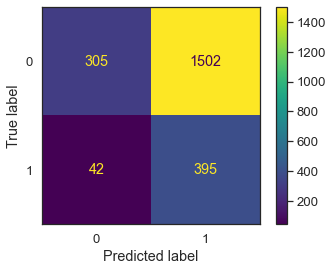

In [242]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [243]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.88      0.17      0.28      1807
           1       0.21      0.90      0.34       437

    accuracy                           0.31      2244
   macro avg       0.54      0.54      0.31      2244
weighted avg       0.75      0.31      0.29      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.90.</li>
<li>Specificity is 0.17.</li>
<li>Precision is 0.21.</li>
<li>Balanced Accuracy is 0.54.</li>
<li>F1 Score is 0.34.</li>
</ul>

Recall here increased at the expense of Specificity. 

### Using a Decision Tree with tuned hyper parameters in adaboost Classifier:

In [244]:
tr = DecisionTreeClassifier(min_samples_leaf=60, min_samples_split=40, max_depth=10, class_weight=classWeightsDict)

In [245]:
params = dict(
    learning_rate = [0.1, 0.5, 1.0, 8.0],
    n_estimators = [50,150, 250, 500, 550, 600]
    )

In [246]:
# initialize the AdaBoostClassifier Object.
clf = AdaBoostClassifier(base_estimator=tr)

In [247]:
# create a gridsearch object
gs = GridSearchCV(estimator=clf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                                                                              1: 2.6275100401606424},
                                                                                max_depth=10,
                                                                                min_samples_leaf=60,
                                                                                min_samples_split=40)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 8.0],
                         'n_estimators': [50, 150, 250, 500, 550, 600]},
             scoring='balanced_accuracy')

In [248]:
%%time
gs.fit(X_train, y_train)

Wall time: 3min 14s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                                                                              1: 2.6275100401606424},
                                                                                max_depth=10,
                                                                                min_samples_leaf=60,
                                                                                min_samples_split=40)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 8.0],
                         'n_estimators': [50, 150, 250, 500, 550, 600]},
             scoring='balanced_accuracy')

In [249]:
# return the best estimator that was chose by the search
gs.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                                                       1: 2.6275100401606424},
                                                         max_depth=10,
                                                         min_samples_leaf=60,
                                                         min_samples_split=40),
                   learning_rate=0.1)

In [250]:
# get parameters for the estimator
gs.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': {0: 0.6175082586125531,
  1: 2.6275100401606424},
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 60,
 'base_estimator__min_samples_split': 40,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight={0: 0.6175082586125531,
                                      1: 2.6275100401606424},
                        max_depth=10, min_samples_leaf=60, min_samples_split=40),
 'learning_rate': 0.1,
 'n_estimators': 50,
 'random_state': None}

In [251]:
# ada2_best_estimator is our model
ada2_best_estimator = gs.best_estimator_

In [252]:
# output the best estimator prediction on the training set.
pred_train = ada2_best_estimator.predict(X_train)

In [253]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.8274742071073748

In [254]:
# output the prediction on the testing set
pred_val = ada2_best_estimator.predict(X_val)

In [255]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.6581996434937611

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

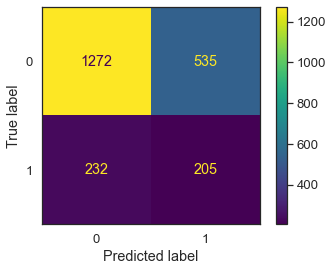

In [256]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [257]:
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

ada2_Specificity = TN/(TN+FP)

ada2_Precision = TP/(TP+FP)

ada2_Recall = TP/(TP+FN)

ada2_F1Score = 2 * ((ada2_Precision * ada2_Recall)/(ada2_Precision + ada2_Recall))

ada2_BalancedAccuracy = (ada2_Recall  + ada2_Specificity)/2

print('ada2_Specificity: %s' %(str(ada2_Specificity)))
print('ada2_Precision: %s' %(str(ada2_Precision)))
print('ada2_Recall: %s' %(str(ada2_Recall)))
print('ada2_F1Score: %s' %(str(ada2_F1Score)))
print('ada2_BalancedAccuracy: %s' %(str(ada2_BalancedAccuracy)))

ada2_Specificity: 0.703929164360819
ada2_Precision: 0.27702702702702703
ada2_Recall: 0.4691075514874142
ada2_F1Score: 0.34834324553950724
ada2_BalancedAccuracy: 0.5865183579241166


In [258]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1807
           1       0.28      0.47      0.35       437

    accuracy                           0.66      2244
   macro avg       0.56      0.59      0.56      2244
weighted avg       0.73      0.66      0.69      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.47.</li>
<li>Specificity is 0.70.</li>
<li>Precision is 0.28.</li>
<li>Balanced Accuracy is 0.59.</li>
<li>F1 Score is 0.35.</li>
</ul>
This one is worse because it produces a lower recall value of 0.47.

<p>Comparing the two adaboostclassifier models, the one with Recall of 0.9 is better than the one with Recall of 0.47.</p>

## With GradientBoostingClassifier

<ul><li>We are going to subsamples rows, columns before creating trees like in Random Forests.</li>
<li>Also, we shall tune the number of trees, tree depth, number of points in the leaves, number of observations per split. </li>
</ul>

### Using GridSearchCV, we check for a combination of different parameters.

In [259]:
params = dict(
    learning_rate = [1.0, 8.0],
    n_estimators = [50, 500],
    max_depth = [5,  100],
    min_samples_split = [100, 500],
    subsample = [0.6,  0.9],
    max_features = ['auto', 'sqrt', 'log2']  
)
params

{'learning_rate': [1.0, 8.0],
 'n_estimators': [50, 500],
 'max_depth': [5, 100],
 'min_samples_split': [100, 500],
 'subsample': [0.6, 0.9],
 'max_features': ['auto', 'sqrt', 'log2']}

In [260]:
# initialize the GradientBoostingClassifier object
clf = GradientBoostingClassifier()

In [261]:
# create a gridsearch object
gs = GridSearchCV(estimator=clf, param_grid=params, scoring='balanced_accuracy', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 8.0], 'max_depth': [5, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [100, 500],
                         'n_estimators': [50, 500], 'subsample': [0.6, 0.9]},
             scoring='balanced_accuracy')

In [262]:
%%time
# run fit will all sets of parameters
gs.fit(X_train_gb, y_train_gb)

Wall time: 4min 9s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 8.0], 'max_depth': [5, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [100, 500],
                         'n_estimators': [50, 500], 'subsample': [0.6, 0.9]},
             scoring='balanced_accuracy')

In [263]:
# return the best estimator that was chose by the search
gs.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, max_depth=100,
                           max_features='auto', min_samples_split=100,
                           n_estimators=50, subsample=0.9)

In [264]:
# get parameters for the estimator
gs.best_estimator_.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.9,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [265]:
# gb_best_estimator is our model
gb_best_estimator = gs.best_estimator_

In [266]:
# output the best estimator prediction on the training set.
pred_train = gb_best_estimator.predict(X_train_gb)

In [267]:
# derive the training accuracy score
metrics.accuracy_score(y_true=y_train, y_pred=pred_train)

0.30607565915170043

In [268]:
# output the prediction on the testing set
pred_val = gb_best_estimator.predict(X_val)

In [269]:
# derive the testing accuracy of the best model
metrics.accuracy_score(y_true=y_val, y_pred=pred_val)

0.5672905525846702

- Using the confusion matrix, we get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score

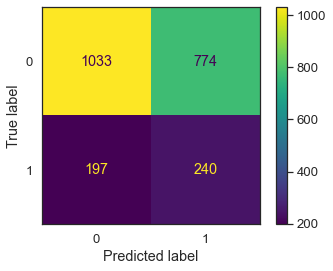

In [270]:
# create a confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val)

In [271]:
TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

gb_Specificity = TN/(TN+FP)

gb_Precision = TP/(TP+FP)

gb_Recall = TP/(TP+FN)

gb_F1Score = 2 * ((gb_Precision * gb_Recall)/(gb_Precision + gb_Recall))

gb_BalancedAccuracy = (gb_Recall  + gb_Specificity)/2

print('gb_Specificity: %s' %(str(gb_Specificity)))
print('gb_Precision: %s' %(str(gb_Precision)))
print('gb_Recall: %s' %(str(gb_Recall)))
print('gb_F1Score: %s' %(str(gb_F1Score)))
print('gb_BalancedAccuracy: %s' %(str(gb_BalancedAccuracy)))

gb_Specificity: 0.5716657443276149
gb_Precision: 0.23668639053254437
gb_Recall: 0.5491990846681922
gb_F1Score: 0.3308063404548587
gb_BalancedAccuracy: 0.5604324144979036


In [272]:
print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1807
           1       0.24      0.55      0.33       437

    accuracy                           0.57      2244
   macro avg       0.54      0.56      0.51      2244
weighted avg       0.72      0.57      0.61      2244



<ul>The following metrics derived from the classification report are:
<li>Recall (Sensitivity) is 0.59.</li>
<li>Specificity is 0.56.</li>
<li>Precision is 0.24.</li>
<li>Balanced Accuracy is 0.57.</li>
<li>F1 Score is 0.34.</li>
</ul>

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

In [273]:
modelL=[
    ['Decision Tree', dtRecall,dtSpecificity, dtPrecision, dtBalancedAccuracy, dtF1Score],
    ['Random Forest ',rf_Recall,rf_Specificity, rf_Precision, rf_BalancedAccuracy, rf_F1Score],
    ['Adaboost',ada_Recall,ada_Specificity, ada_Precision, ada_BalancedAccuracy, ada_F1Score],
    ['Gradient Boosting',gb_Recall,gb_Specificity, gb_Precision, gb_BalancedAccuracy, gb_F1Score]
       ]

dfBestModels = pd.DataFrame(modelL, columns =['Classifier','Recall (%)','Specificity (%)','Precision (%)', 'Balanced Accuracy (%)', 'F1 Score (%)'])

In [274]:
# show the results
dfBestModels

Classifier  Recall (%)  Specificity (%)  Precision (%)  \
0      Decision Tree    0.544622         0.617045       0.255914   
1     Random Forest     0.544622         0.691754       0.299371   
2           Adaboost    0.903890         0.168788       0.208224   
3  Gradient Boosting    0.549199         0.571666       0.236686   

   Balanced Accuracy (%)  F1 Score (%)  
0               0.580834      0.348208  
1               0.618188      0.386364  
2               0.536339      0.338475  
3               0.560432      0.330806

## Confusion Matrix for the best fitted:

### 1-Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.62      0.71      1807
           1       0.26      0.54      0.35       437

    accuracy                           0.60      2244
   macro avg       0.55      0.58      0.53      2244
weighted avg       0.73      0.60      0.64      2244

Specificity: 0.62
Precision: 0.26
Recall: 0.54
F1-Score: 0.35
Balanced Accuracy: 0.58

The confusion matrix is below:


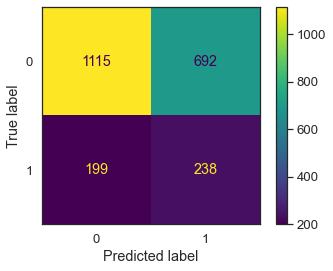

In [275]:
dt_best_estimator

# output the best estimator prediction on the training set
pred_train = dt_best_estimator.predict(X_train)
#pred_train

# output the prediction on the testing set
pred_val = dt_best_estimator.predict(X_val)


print('Classification Report:\n')
print(metrics.classification_report(y_val, pred_val))

TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Specificity: %s' %(str(round(Specificity,2))))
print('Precision: %s' %(str(round(Precision, 2))))
print('Recall: %s' %(str(round(Recall, 2))))
print('F1-Score: %s' %(str(round(F1Score, 2))))
print('Balanced Accuracy: %s' %(str(round(BalancedAccuracy, 2))))

print('\nThe confusion matrix is below:')
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val);

### 2-Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1807
           1       0.30      0.54      0.39       437

    accuracy                           0.66      2244
   macro avg       0.58      0.62      0.58      2244
weighted avg       0.75      0.66      0.69      2244

Specificity: 0.69
Precision: 0.3
Recall: 0.54
F1-Score: 0.39
Balanced Accuracy: 0.62

The confusion matrix is below:


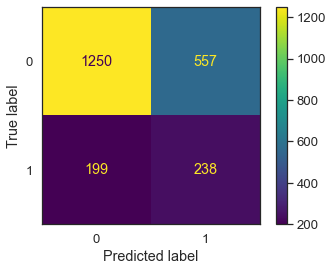

In [276]:
# output the prediction on the testing set
pred_val = rfn_best_estimator.predict(X_val)


print('Classification Report:\n')
print(metrics.classification_report(y_val, pred_val))

TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Specificity: %s' %(str(round(Specificity, 2))))
print('Precision: %s' %(str(round(Precision, 2))))
print('Recall: %s' %(str(round(Recall, 2))))
print('F1-Score: %s' %(str(round(F1Score, 2))))
print('Balanced Accuracy: %s' %(str(round(BalancedAccuracy, 2))))

print('\nThe confusion matrix is below:')
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val);

### 3-AdaBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.17      0.28      1807
           1       0.21      0.90      0.34       437

    accuracy                           0.31      2244
   macro avg       0.54      0.54      0.31      2244
weighted avg       0.75      0.31      0.29      2244

Specificity: 0.17
Precision: 0.21
Recall: 0.9
F1-Score: 0.34
Balanced Accuracy: 0.54

The confusion matrix is below:


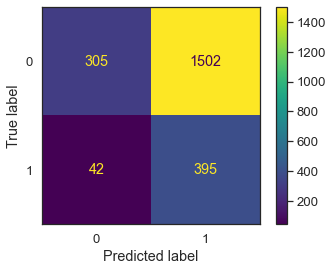

In [277]:
# output the classifier's prediction on the testing/validation set.
pred_val = ada_best_estimator.predict(X_val)


print('Classification Report:\n')
print(metrics.classification_report(y_val, pred_val))

TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Specificity: %s' %(str(round(Specificity, 2))))
print('Precision: %s' %(str(round(Precision, 2))))
print('Recall: %s' %(str(round(Recall, 2))))
print('F1-Score: %s' %(str(round(F1Score, 2))))
print('Balanced Accuracy: %s' %(str(round(BalancedAccuracy, 2))))

print('\nThe confusion matrix is below:')
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val);

### 4-Gradient Boosting

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      1807
           1       0.24      0.55      0.33       437

    accuracy                           0.57      2244
   macro avg       0.54      0.56      0.51      2244
weighted avg       0.72      0.57      0.61      2244

Specificity: 0.57
Precision: 0.24
Recall: 0.55
F1-Score: 0.33
Balanced Accuracy: 0.56

The confusion matrix is below:


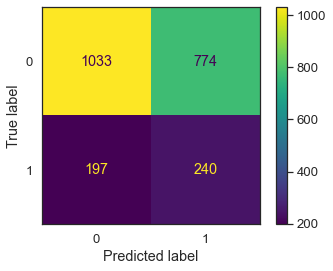

In [278]:
# output the prediction on the testing set
pred_val = gb_best_estimator.predict(X_val)


print('Classification Report:\n')
print(metrics.classification_report(y_val, pred_val))

TN, FP, FN, TP = metrics.confusion_matrix(y_true=y_val, y_pred=pred_val).ravel() # return the elements of the matrix as array

Specificity = TN/(TN+FP)

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1Score = 2 * ((Precision * Recall)/(Precision + Recall))

BalancedAccuracy = (Recall  + Specificity)/2

print('Specificity: %s' %(str(round(Specificity, 2))))
print('Precision: %s' %(str(round(Precision, 2))))
print('Recall: %s' %(str(round(Recall, 2))))
print('F1-Score: %s' %(str(round(F1Score, 2))))
print('Balanced Accuracy: %s' %(str(round(BalancedAccuracy, 2))))

print('\nThe confusion matrix is below:')
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val, y_pred=pred_val);

# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

#### Using Random Forest as my winner model.

In [279]:
loans_outcome_not_known.head() # display the first 5 records

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1324       540.96       10.596635   
1              0         educational    0.1221       333.15       11.156193   
2              1  debt_consolidation    0.1218       166.50       10.753836   
3              0      major_purchase    0.1461       124.12       10.239960   
4              1         credit_card    0.0800       156.69       10.434116   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  11.73   672        3210.000000       5671        55.1               0   
1  15.82   707        5314.000000     107643        81.0               3   
2   6.38   772        1440.000000        233         6.7               0   
3   0.00   692        1530.041667          0         0.0               6   
4  15.85   767       10170.000000       5748        12.3               0   

   delinq.2yrs  pub.rec  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            1        0

#### first, we need to use pd.get_dummies() to create a fixed larger dataframe that has new feature columns  with dummy variables

In [280]:
# purpose is one of the categorical variable that needs to be converted into a dummy variable.
cat_feats = ['purpose']

# create a fixed larger data frame with new feature columns which are dummy variables
loansOutComeNotKnown_dummy = pd.get_dummies(loans_outcome_not_known, columns=cat_feats)

# display the first 5 five records.
loansOutComeNotKnown_dummy.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1324       540.96       10.596635  11.73   672   
1              0    0.1221       333.15       11.156193  15.82   707   
2              1    0.1218       166.50       10.753836   6.38   772   
3              0    0.1461       124.12       10.239960   0.00   692   
4              1    0.0800       156.69       10.434116  15.85   767   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        3210.000000       5671        55.1               0            0   
1        5314.000000     107643        81.0               3            0   
2        1440.000000        233         6.7               0            0   
3        1530.041667          0         0.0               6            0   
4       10170.000000       5748        12.3               0            1   

   pub.rec  purpose_all_other  purpose_credit_card  \
0        0                  0                    0   
1        0                  0                    0   
2        0                  0                    0   
3        0                  0                    0   
4        0                  0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           1                    0                         0   
1                           0                    1                         0   
2                           1                    0                         0   
3                           0                    0                         0   
4                           0                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       1                       0  
4                       0                       0

In [281]:
# checking the shape of the hold-out set
loansOutComeNotKnown_dummy.shape

(2100, 19)

In [282]:
# checking the shape of the X_train data set
X_train.shape

(5234, 19)

In [283]:
# output the classifier's prediction on the training set. 
# using the best model as Random Forest
predictions = rfn_best_estimator.predict(loansOutComeNotKnown_dummy)
predictions

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [284]:
# convert the numpy arreay into data frame
predictionRes = pd.DataFrame(predictions)
predictionRes.columns = ['predictions']

In [285]:
# writing the predictions to a file.
predictionRes.to_csv('predictions.csv')

# Great Job!